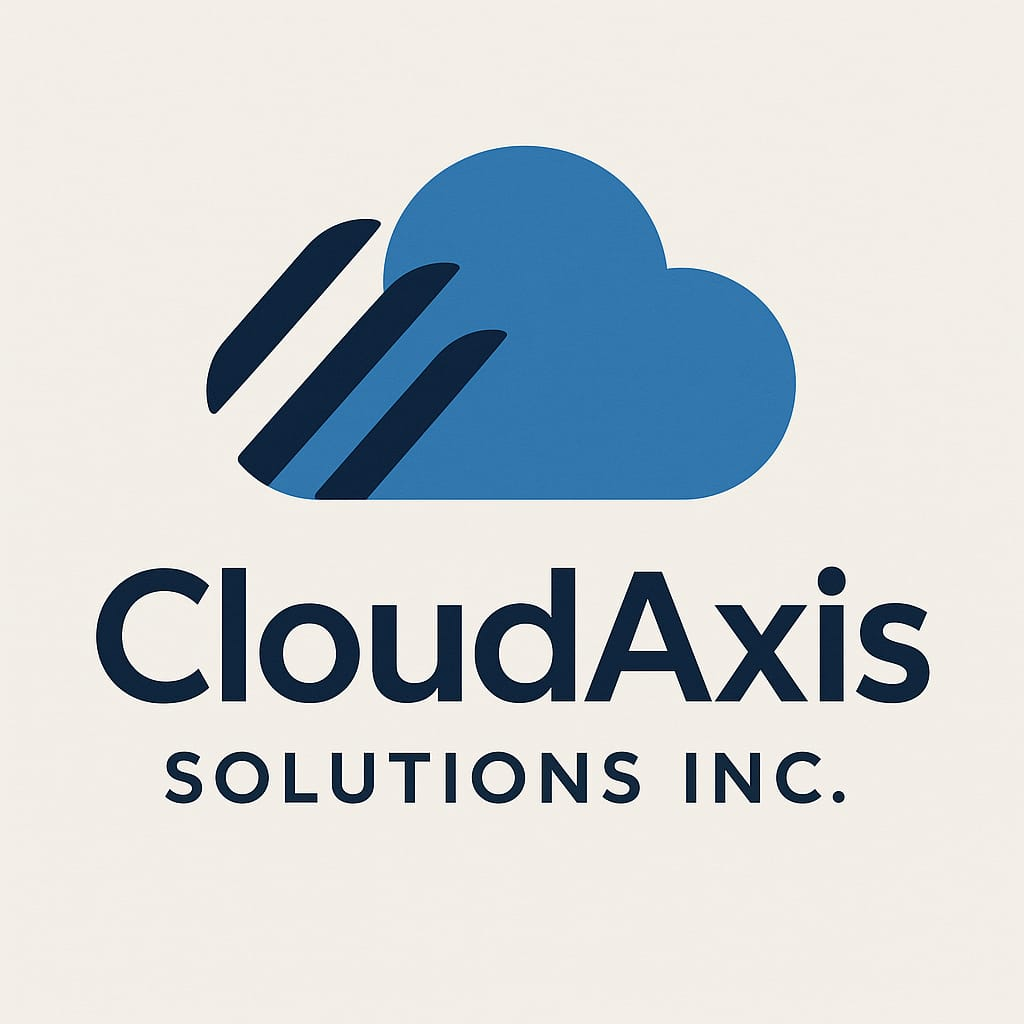

In [1]:
from IPython.display import Image, display

display(Image(filename="C:\\Users\\regid\\Downloads\\Logo Capstone.jpg"))



***BACKGROUND***
---
**CloudAxis Solutions Inc.** adalah perusahaan SaaS (Software as a Service) multinasional yang berkantor pusat di New York (AS).
Didirikan pada tahun 2011, CloudAxis fokus menyediakan berbagai platform software terpadu untuk pengelolaan data, pemasaran digital, solusi keuangan bagi perusahaan lintas industri dan masih banyak lagi.

SaaS (Software as a Service) adalah model penyediaan perangkat lunak berbasis cloud di mana aplikasi dihosting oleh penyedia layanan dan diakses oleh pengguna melalui internet. Pengguna tidak perlu menginstal, mengelola, atau memperbarui perangkat lunak secara mandiri karena semuanya dikelola oleh penyedia SaaS.

*NOTE:*
Pada kasus kali ini data yang akan dianalisis adalah data histori penjualan yang dimiliki oleh CloudAxis Solutions Inc. dimana berikut adalah hal yang akan dianalisis:
1. Profit.
2. Sales.
3. Discount.
4. Order Date.
5. Customer.
6. Subregion.
7. Region.
8. Quantity.

data mentah ini akan dicek terlebih dahulu berkaitan dengan distribusi data, data missing, data outlier, penambahan dan/atau pengurangan kolom, sehingga menjadi data yang bersih dan siap untuk diolah agar hasil dari analisis bisa sesuai dengan yang diinginkan.


***Problem Statement***
---
1. Bagaimana perusahaan dapat meningkatkan profit dan sales?
2. Bagaimana penerapan diskon yang sudah berjalan?
3. Bagaimana cara mengoptimalkan customer yang ada?
4. Apakah ada ruang untuk melakukan ekspansi?


***Goal***
---
Tujuan utama sebagai Data Analyst adalah untuk memberikan **insights** kepada perusahaan terhadap masalah yang terjadi dan agar dapat mengoptimalisasi kinerja serta meningkatkan profit melalui **insights** dan **rekomendasi** langkah yang dihasilkan dari analisis data yang dilakukan.


***Stake Holder***
---
Stake Holder untuk hasil analisi data ini ialah Manajemen CloudAxis, yang diantaranya:

1. Business Development

Bertanggung jawab atas strategi penetapan harga, kebijakan diskon, dan peningkatan profit.

Membutuhkan analisis untuk mengevaluasi dampak diskon terhadap profit dan menyesuaikan harga produk.

2. Tim Penjualan (Sales Team)

Regional Sales Manager (EMEA, AMER, APAC): Memantau performa masing-masing wilayah.

Account Executive: Memahami perilaku dan kebutuhan customer mereka.

3. Tim Produk

Product Manager: Melihat produk mana yang paling laris, margin profit, dan feedback pasar.

4. Quality Assurance (QA): 

Dengan adanya temuan profit yang negatif tim ini perlu mengetahui dan memastikan barang layak, memenuhi standard dan sesuai dengan demand market untuk memastikan juga bahwa profit negatif terjadi bukan serta merta kesalahan produksi.

5. Customer Support & Services

Dengan kemungkinan berdiskusi dengan customer support and service dapat memberi wawasan tentang POV dari customer dan jika ada perubahan tim bisa menginfokan dengan baik kepada customer untuk menjaga informasi tersampaikan dengan baik dan menjaga hubungan baik dengan customer.

***LOAD DATA DAN IMPORT LIBRARY***
---

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, kruskal

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
df =  pd.read_csv("C:\\Users\\regid\\OneDrive\\Documents\\Capstone\\CAPSTONE II\\SaaS-Sales.csv")
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


***Data Understanding***
---

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

- Terdapat 9994 row data
- terdapat 19 columns
- Tipe data yang tersemat ada 3 jenis yakni int64, object dan float

**Deskripsi Kolom**
| No. | Nama Kolom    | Deskripsi Kolom                                      |
|-----|---------------|------------------------------------------------------|
| 1   | Row ID        | Identifikasi unik untuk setiap transaksi.            |
| 2   | Order ID      | Identifikasi unik untuk setiap pesanan.              |
| 3   | Order Date    | Tanggal ketika pesanan ditempatkan.                  |
| 4   | Date Key      | Representasi numerik dari tanggal pesanan (YYYYMMDD).|
| 5   | Contact Name  | Nama orang yang menempatkan pesanan.                 |
| 6   | Country       | Negara tempat pesanan ditempatkan.                   |
| 7   | City          | Kota tempat pesanan ditempatkan.                     |
| 8   | Region        | Wilayah tempat pesanan ditempatkan.                  |
| 9   | Subregion     | Subwilayah tempat pesanan ditempatkan.               |
| 10  | Customer      | Nama perusahaan yang menempatkan pesanan.            |
| 11  | Customer ID   | Identifikasi unik untuk setiap pelanggan.            |
| 12  | Industry      | Industri yang dimiliki oleh pelanggan.               |
| 13  | Segment       | Segmen pelanggan (SMB, Strategis, Enterprise, dll.). |
| 14  | Product       | Produk yang dipesan.                                 |
| 15  | License       | Kunci lisensi untuk produk.                          |
| 16  | Sales         | Jumlah penjualan total untuk transaksi.              |
| 17  | Quantity      | Jumlah total barang dalam transaksi.                 |
| 18  | Discount      | Diskon yang diterapkan pada transaksi.               |
| 19  | Profit        | Keuntungan dari transaksi.                           |

***Pengecekan Missing Value dan Data Duplikat***

In [4]:
# Pengecekan missing values
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
# Pengecekan data duplikat
df.duplicated().sum()

0

Tidak terapat missing value maupun duplikat dalam data.



**Drop Columns**

Kolom yang akan di drop adalah kolom '**Row Id**' dikarenakan sudah adanya index dalam tabel dan '**Date Key**' dikarenakan sudah adanya kolom 'Order Date' yang menginfokan hal yang serupa.

In [6]:

df = df.drop(columns=['Row ID','Date Key']) # Menghapus kolom "Row ID" dan "Date Key"
df.head() # Menampilkan dataset yang sudah update

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,6/13/2022,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [7]:
df.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,6/13/2022,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


**Perubahan Tipe Data Kolom Order Date dan Penambahan Kolom**

dikarenakan kolom 'Order Date' masih bertipe data int64 makan dilakukan perubahan ke tipe data datetime64 agar dapat memudahkan analisa serta menambahkan kolom Year sebagai tahun dilakukannya transaksi, kolom Year-Quarter sebagai dimasa mana transkasi tersebut berlangsung dan kolom Profit per Sales Ratio sebagai ratio profit terhadap sales untuk memudahkan dan memperdalam analisis data.

In [8]:
# Mengubah kolom Order Date ke format datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Membuat kolom baru 'Year' dan 'Year-Quarter' dengan mengekstrak tahun dari Order Date
df['Year'] = df['Order Date'].dt.year
df['Year-Quarter'] = df['Year'].astype(str) + '-' +  'Q' + df['Order Date'].dt.quarter.astype(str)

# Membuat kolom baru Profit perSales Ratio
df['Profit perSales Ratio'] = df['Profit']/df['Sales'] 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Order ID               9994 non-null   object        
 1   Order Date             9994 non-null   datetime64[ns]
 2   Contact Name           9994 non-null   object        
 3   Country                9994 non-null   object        
 4   City                   9994 non-null   object        
 5   Region                 9994 non-null   object        
 6   Subregion              9994 non-null   object        
 7   Customer               9994 non-null   object        
 8   Customer ID            9994 non-null   int64         
 9   Industry               9994 non-null   object        
 10  Segment                9994 non-null   object        
 11  Product                9994 non-null   object        
 12  License                9994 non-null   object        
 13  Sal

In [10]:
# Untuk menampilkan semua baris dan kolom tanpa potongan (batasan)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 
def unique_data(df): # Membuat fungsi untuk menampilkan setiap unique value dan jumlahnya pada setiap kolom
    
    data_unique = pd.DataFrame()
    data_unique['Column Name'] = df.columns
    data_unique['Number of Unique'] = [df[col].nunique() for col in (df.columns)]
    data_unique['Unique Sample'] = [df[col].unique() for col in (df.columns)] 
    return data_unique

unique_data(df)

,Column Name,Number of Unique,Unique Sample
0,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
1,Order Date,1237,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 2021-10-11 00:00:00, 2020-06-09 00:00:00, 2023-04-16 00:00:00, 2022-12-06 00:00:00, 2021-11-22 00:00:00, 2020-11-11 00:00:00, 2020-05-13 00:00:00, 2020-08-27 00:00:00, 2022-12-10 00:00:00, 2023-07-17 00:00:00, 2021-09-25 00:00:00, 2022-01-16 00:00:00, 2021-09-17 00:00:00, 2023-10-20 00:00:00, 2022-12-09 00:00:00, 2021-12-27 00:00:00, 2023-09-11 00:00:00, 2022-07-18 00:00:00, 2023-09-20 00:00:00, 2022-03-12 00:00:00, 2020-10-20 00:00:00, 2022-06-21 00:00:00, 2021-04-18 00:00:00, 2022-12-12 00:00:00, 2022-06-18 00:00:00, 2021-11-24 00:00:00, 2021-04-30 00:00:00, 2020-12-05 00:00:00, 2022-06-05 00:00:00, 2022-09-19 00:00:00, 2023-09-15 00:00:00, 2021-04-26 00:00:00, 2023-12-10 00:00:00, 2020-11-26 00:00:00, 2020-10-12 00:00:00, 2021-09-03 00:00:00, 2023-11-14 00:00:00, 2023-05-29 00:00:00, 2023-10-27 00:00:00, 2022-04-06 00:00:00, 2022-09-18 00:00:00, 2021-01-31 00:00:00, 2023-11-07 00:00:00, 2023-11-10 00:00:00, 2023-06-18 00:00:00, 2022-09-07 00:00:00, 2022-08-30 00:00:00, 2022-12-02 00:00:00, 2021-11-13 00:00:00, 2023-11-24 00:00:00, 2021-10-15 00:00:00, 2023-12-26 00:00:00, 2022-11-04 00:00:00, 2020-08-25 00:00:00, 2021-03-02 00:00:00, 2021-04-05 00:00:00, 2020-12-26 00:00:00, 2020-09-20 00:00:00, 2023-11-06 00:00:00, 2022-11-07 00:00:00, 2023-02-03 00:00:00, 2022-10-14 00:00:00, 2022-09-06 00:00:00, 2023-09-19 00:00:00, 2023-12-23 00:00:00, 2021-09-07 00:00:00, 2020-10-22 00:00:00, 2022-03-14 00:00:00, 2021-05-31 00:00:00, 2021-05-28 00:00:00, 2020-03-01 00:00:00, 2022-11-21 00:00:00, 2022-05-12 00:00:00, 2021-12-28 00:00:00, 2022-11-17 00:00:00, 2022-11-08 00:00:00, 2020-09-08 00:00:00, 2020-08-05 00:00:00, 2020-09-14 00:00:00, 2023-04-22 00:00:00, 2021-11-21 00:00:00, 2021-12-15 00:00:00, 2020-11-19 00:00:00, 2022-11-29 00:00:00, 2020-08-26 00:00:00, 2022-07-17 00:00:00, 2021-10-12 00:00:00, 2021-10-31 00:00:00, 2020-03-21 00:00:00, 2023-07-07 00:00:00, 2023-06-25 00:00:00, 2020-08-03 00:00:00, 2023-12-18 00:00:00, 2023-06-04 00:00:00, 2023-12-02 00:00:00, 2021-02-09 00:00:00, 2021-01-02 00:00:00, 2022-10-29 00:00:00, ...]"
2,Contact Name,793,"[Nathan Bel

Kolom License merupakan satu-satunya kolom yang setiap valuenya uniqe.

In [11]:
df.groupby(['Customer', 'Contact Name'])['Segment'].value_counts().reset_index()

,Customer,Contact Name,Segment,count
0,AT&T,Blake Campbell,Strategic,24
1,AT&T,Connor Paige,SMB,16
2,AT&T,Frank Hart,SMB,5
3,AT&T,Ian Sharp,SMB,5
4,AT&T,Jan Baker,Enterprise,3
5,AT&T,Phil Dowd,Strategic,19
6,AT&T,Stephen Dyer,SMB,31
7,AT&T,Una Hudson,Enterprise,20
8,AT&T,William May,Strategic,28
9,Abbott Laboratories,Colin Hamilton,SMB,16


Setiap Customer mempunyai beragam segment usaha dan setiap transaksi untuk segment tersebut diwakili oleh beberapa orang sebagai PIC.

**Penjelasan Produk**
---
| Nama Produk               | Deskripsi Singkat                                                                 | Kategori          | Varian                     |
|---------------------------|-----------------------------------------------------------------------------------|-------------------|----------------------------|
| Marketing Suite           | Paket alat pemasaran digital untuk kampanye, audiens, dan otomatisasi.            | Pemasaran         | Marketing Suite - Gold     |
| FinanceHub                | Solusi keuangan cloud untuk manajemen anggaran dan analisis finansial.            | Keuangan          | -                          |
| ContactMatcher            | Alat untuk mencocokkan dan mengelola kontak pelanggan (CRM/sales automation).     | Pemasaran         | -                          |
| SaaS Connector Pack       | Konektor integrasi untuk aplikasi SaaS dengan platform lain.                      | Integrasi         | SaaS Connector Pack - Gold |
| ChatBot Plugin            | Plugin untuk membuat dan mengelola chatbot di website/aplikasi.                   | AI/Otomatisasi    | -                          |
| Site Analytics            | Alat analisis lalu lintas website dan perilaku pengguna.                          | Pemasaran         | -                          |
| OneView                   | Dashboard terpusat untuk memantau aktivitas bisnis.                               | Operasional       | -                          |
| Support                   | Sistem tiket atau layanan dukungan pelanggan berbasis SaaS.                       | Operasional       | -                          |
| Data Smasher              | Alat pemrosesan big data untuk analisis/transformasi data.                        | Data              | -                          |
| Storage                   | Penyimpanan cloud untuk file dan data bisnis.                                     | Data              | -                          |
| Big Ol Database           | Database performa tinggi untuk beban kerja besar.                                 | Data              | -                          |
| Alchemy                   | Alat transformasi data atau AI (pemrosesan canggih).                              | AI/Otomatisasi    | -                          |

***Data Outliers & Pola Pesebaran Nilai***
---

Memahami outlier merupakan langkah penting dalam anlasis data karena dapat menentukan arah analisis yang tepat terutama dalam uji statistik agar hasil sesuai eksepetasi yang diinginkan, selain itu juga kita dapat memahami bagaimana kondisi data yang dimiliki.

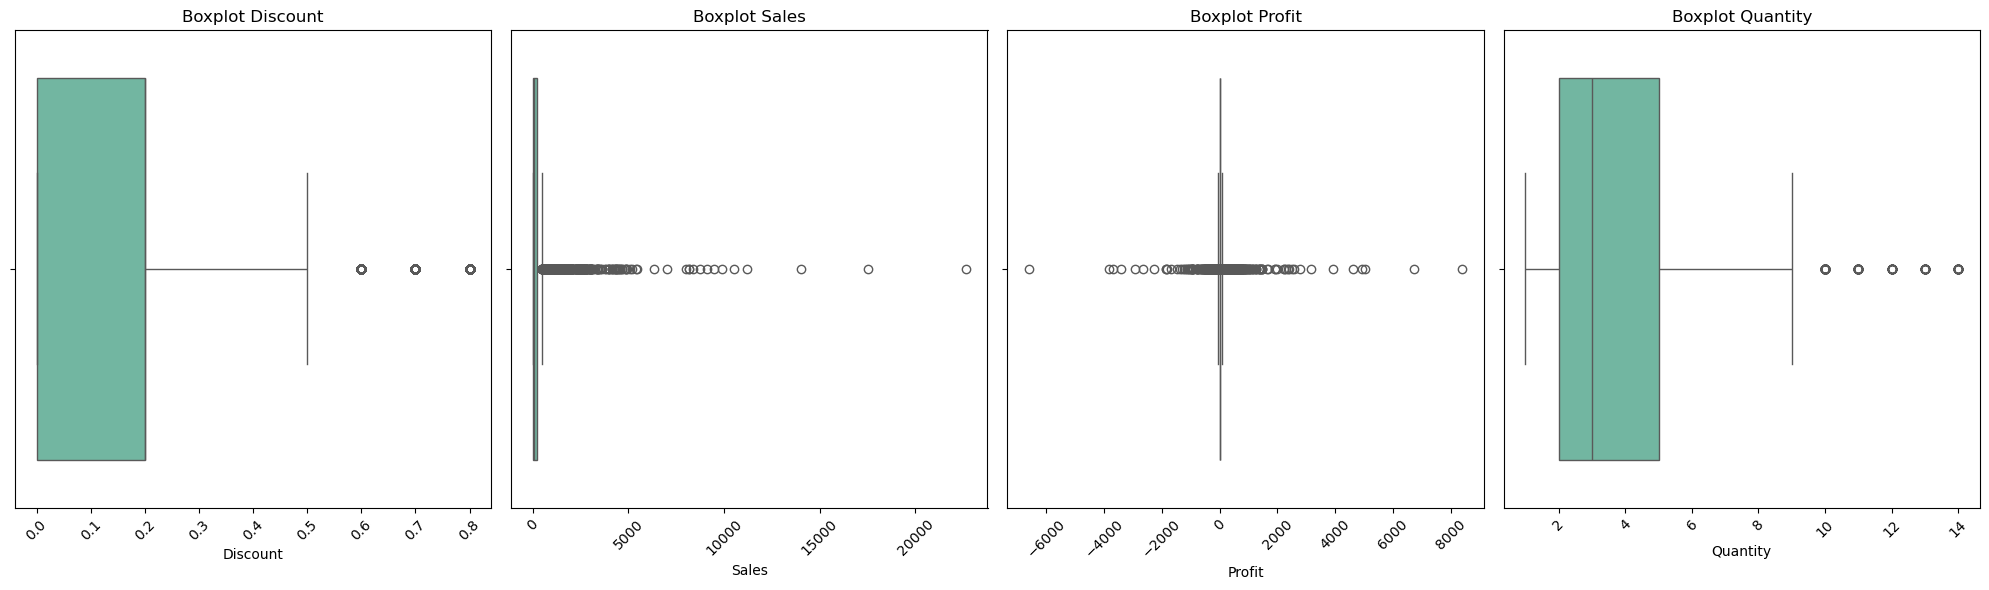

In [12]:
plt.figure(figsize=(20, 6))

# Boxplot Discount
plt.subplot(1, 4, 1)
sns.boxplot(data=df, x='Discount', palette="Set2")
plt.title('Boxplot Discount')
plt.xticks(rotation=45)

# Boxplot Sales
plt.subplot(1, 4, 2)
sns.boxplot(data=df, x='Sales', palette="Set2")
plt.title('Boxplot Sales')
plt.xticks(rotation=45)

# Boxplot Profit
plt.subplot(1, 4, 3)
sns.boxplot(data=df, x='Profit', palette="Set2")
plt.title('Boxplot Profit')
plt.xticks(rotation=45)

# Boxplot Quantity
plt.subplot(1, 4, 4)
sns.boxplot(data=df, x='Quantity', palette="Set2")
plt.title('Boxplot Quantity')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

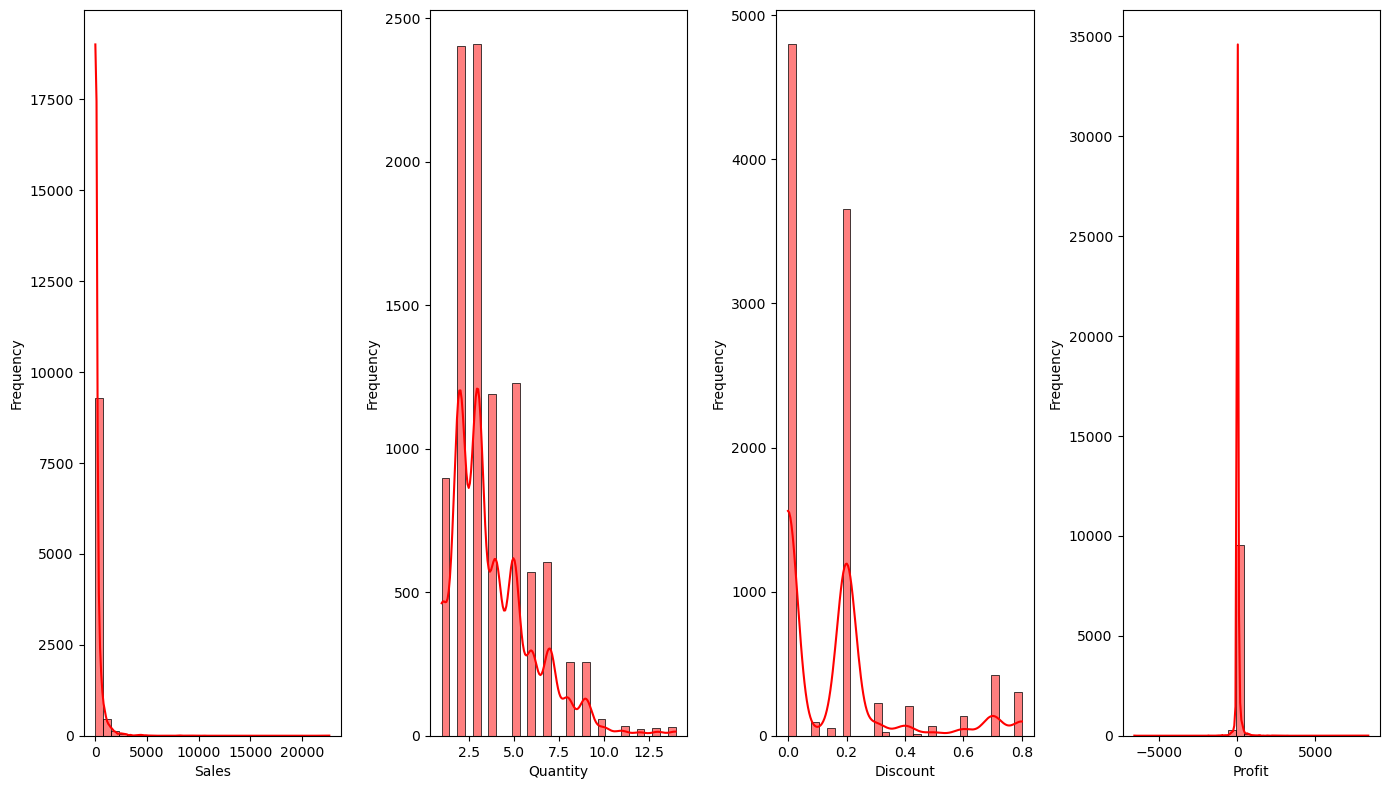

In [13]:
# Daftar kolom yang ingin diuji
columns_of_interest = ['Sales', 'Quantity', 'Discount', 'Profit']
alpha = 0.05

# Buat figure dengan 4 subplot vertikal
plt.figure(figsize=(14, 8))

for i, column_of_interest in enumerate(columns_of_interest, 1):
    # Ekstrak kolom untuk analisis
    data = df[column_of_interest]

    
    # Visualisasikan distribusi dengan histogram di subplot
    plt.subplot(1, 4, i)
    sns.histplot(data, kde=True, color='red', bins=30)
   
    plt.xlabel(column_of_interest)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Dari data grafik dan boxplot sebelumnya bisa dilihat bahwa semua data menunjukan distribusi tidak normal dengan skew kanan (Sales, Quantity, Discount, Profit).


In [14]:

# Buat penampungan untuk data outlier
outliers_storage = {}

for column in ['Sales', 'Quantity', 'Discount', 'Profit']:
    # hitung Q1, Q3 dan IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menghitung batas bawah dan atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mencari nilai outlier
    outliers_condition = (df[column] < lower_bound) | (df[column] > upper_bound)
    outliers = df[outliers_condition]

    # Menyimpan dalam penampungan
    outliers_storage[column] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'number_of_outliers': outliers_condition.sum(),
        'outliers_indices': outliers.index.tolist()  
    }

outliers_summary = {key: {'jumlah outliers': value['number_of_outliers'],
                        'lower and upper bounds': (value['lower_bound'],'&', value['upper_bound'])
                          } 
                    for key, value in outliers_storage.items()}

data_outlier = pd.DataFrame.from_dict(outliers_summary)
data_outlier

,Sales,Quantity,Discount,Profit
jumlah outliers,1167,170,856,1881
lower and upper bounds,"(-271.71000000000004, &, 498.93)","(-2.5, &, 9.5)","(-0.30000000000000004, &, 0.5)","(-39.724125, &, 70.816875)"


**Rangkuman**

- **Sales:** 
    - Lower Bound: -272
    - Upper Bound: 499
    - Jumlah Outlier: 1167

Terdapat 1167 data yang memiliki rentang nilai yang sangat tinggi (outlier), menunjukan penjualan cukup stabil karena nilai outlier hanya berada dikisaran angka 11.7%

- **Quantity:**
    - Lower Bound: -2.5
    - Upper Bound: 10
    - Jumlah Outliers: 170

Terdapat 170 data yang memiliki rentang nilai yang tinggi, menunjukan penjualan yang terbilang stabil jika dilihat dalam jumlah, mengingat dataset ini memiliki 9994 data.

- **Discount:**
    - Lower Bound: -0.3
    - Upper Bound: 0.5
    - Jumlah Outliers: 856

Terdapat 856 data yang memiliki rentang nilai yang berada didalam area outlier, menunjukan pemberian diskon kepada customer yang kurang terukur sebanyak 856 kali.

- **Profit:**
    - Lower Bound: -40
    - Upper Bound: 71
    - Jumlah Outliers: 1881
    
Terdapat 1881 data yang memiliki rentang nilai yang sangat tinggi ataupun rendah, menunjukan angka profit yang tidak stabil dalam setiap transaksinya bahkan boxplot menunjukan terdapat banyak kerugian dalam transaksi yang terjadi yang sangat membutuhkan evaluasi mendalam terkait hal ini.  

***Cek Anomali Data***
---
Anomali data dapat di cek dengan asumsi:
1. Sales <= 0, tidak mungkin penjualan mencatatkan sales 0 terkecuali diskon sebesar 100%.
2. Quantity <= 0, tidak mungkin penjualan tanpa mencatatkan quantity (jumlah yang dijual) = 0.
3. Discount < 0, Diskon tidak boleh kurang dari 0.
5. Region, Sub-Region, Country dan City harus barkaitan dan sesuai.
6. License haruslah unik setiap penjualan karena setiap license berisikan kode unik dan tidak boleh sama antara satu dengan yang lainnya.
7. Order ID , Region dan Order Date harus saling berkaitan, karena dalam Order ID terdapat tahun terjadinya transaksi.
8. Rentang waktu Order Date harus sesuai.
9. Industry dan Product harus saling berkaitan, karena kolom Industry menggambarkan fungsi dari Product.


In [15]:
# Uji anomali kolom Sales
df[df['Sales'] <= 0]

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Year,Year-Quarter,Profit perSales Ratio


Tidak terdapat anomali pada kolom Sales.

In [16]:
# Uji anomali kolom Quantity
df[df['Quantity'] <= 0]

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Year,Year-Quarter,Profit perSales Ratio


Tidak terdapat anomali pada kolom Quantity.

In [17]:
# Uji anomali kolom Discount
df[df['Discount'] < 0]

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Year,Year-Quarter,Profit perSales Ratio


Tidak terdapat anomali pada kolom Discount.

In [18]:
# Uji anomali dalam kolom Region, Subregion, Country dan City
df.groupby(['Region', 'Subregion', 'Country'])['City'].unique().reset_index()

,Region,Subregion,Country,City
0,AMER,LATAM,Argentina,"[Córdoba, Buenos Aires, Mendoza, Rosario]"
1,AMER,LATAM,Brazil,"[Salvador, Rio de Janeiro, São Paulo, Manaus, Belo Horizonte, Brasília]"
2,AMER,LATAM,Chile,"[Puente Alto, Santiago, Antofagasta]"
3,AMER,LATAM,Colombia,"[Bogotá, Medellín, Cali]"
4,AMER,LATAM,Costa Rica,[San José]
5,AMER,LATAM,Mexico,"[Mexico City, Monterrey, Guadalajara, Puerto Vallarta, Toluca, Tijuana, Cancun, Cabo San Lucas]"
6,AMER,NAMER,Canada,"[Toronto, Vancouver, Hamilton, Ottawa, Montreal, Calgary, Quebec, Regina, Winnipeg, Victoria]"
7,AMER,NAMER,United States,"[New York City, Los Angeles, Aurora, Newark, Chicago, Raleigh, Providence, Oklahoma City, Rochester, Seattle, Detroit, Lafayette, Jacksonville, Long Beach, Henderson, Columbus, Milwaukee, San Francisco, Miami, Yonkers, Roswell, Baltimore, Atlanta, Jackson, Springfield, Richmond, Huntsville, San Diego, Louisville, Tampa, Virginia Beach, Philadelphia, Columbia, Oakland, Dallas, Phoenix, Anaheim, Lawrence, Austin, Burlington, Sacramento, Fort Worth, Houston, Nashville, Wilmington, Indianapolis, Lakewood, Arlington, San Jose, Fresno, Lakeland, Lancaster, Buffalo, San Antonio, Cleveland, Charlotte, Tucson, Tulsa, Denver, Alexandria, Las Vegas, Minneapolis, Omaha, Franklin, Tallahassee, Everett, Clinton, Memphis]"
8,APJ,ANZ,Australia,"[Wollongong, Sydney, Canberra, Geelong, Melbourne, Adelaide, Brisbane, Hobart, Gold Coast, Perth]"
9,APJ,ANZ,New Zealand,"[Wellington, Auckland]"


Dari tabel diatas bisa dilihat Region EMEA(Europe, Middle Easte),  APJ(Asia Pacific, Japan) dan AMER (Benua America) memiliki Subregion, Negara dan nama kota yang sesuai, tidak ada anomali.

In [19]:
# Uji anomali dalam kolom License
df['License'].nunique()

9994

Tidak ada anomali dalam kolom license karena kode unik terdapat 9994 buah sesuai rentang dataset.

In [20]:
# Uji anomali kolom Oder ID 
df.groupby(['Order ID', 'Region'])['Order Date'].unique().reset_index()

,Order ID,Region,Order Date
0,AMER-2020-100090,AMER,[2020-07-08 00:00:00]
1,AMER-2020-100279,AMER,[2020-03-10 00:00:00]
2,AMER-2020-100363,AMER,[2020-04-08 00:00:00]
3,AMER-2020-100762,AMER,[2020-11-24 00:00:00]
4,AMER-2020-100860,AMER,[2020-03-26 00:00:00]
5,AMER-2020-100867,AMER,[2020-10-19 00:00:00]
6,AMER-2020-101175,AMER,[2020-12-09 00:00:00]
7,AMER-2020-101392,AMER,[2020-12-07 00:00:00]
8,AMER-2020-101462,AMER,[2020-04-20 00:00:00]
9,AMER-2020-101560,AMER,[2020-11-28 00:00:00]


Tidak terapat data anomali pada kolom Order ID

In [21]:
# Uji Anomali kolom Order Date
date_min = df['Order Date'].min()
date_max = df['Order Date'].max()
print(f'''
First order: {date_min}
Last order: {date_max}''')


First order: 2020-01-04 00:00:00
Last order: 2023-12-31 00:00:00


Tidak ada anomali pada kolom Order Date, transaksi pertama yang tercatat ialah pada tanggal 2020/01/04 dan transaksi terakhir ialah 2023/12/31.

In [22]:
# Uji Anomali kolom Industry dan Product
df.groupby('Industry')['Product'].unique().reset_index()

,Industry,Product
0,Communications,"[ChatBot Plugin, Marketing Suite - Gold, OneView, Data Smasher, ContactMatcher, Support, Big Ol Database, SaaS Connector Pack, SaaS Connector Pack - Gold, FinanceHub, Site Analytics, Storage, Marketing Suite]"
1,Consumer Products,"[ContactMatcher, Site Analytics, SaaS Connector Pack, Data Smasher, Support, OneView, SaaS Connector Pack - Gold, ChatBot Plugin, FinanceHub, Marketing Suite, Big Ol Database, Marketing Suite - Gold, Storage, Alchemy]"
2,Energy,"[Marketing Suite, FinanceHub, ContactMatcher, Marketing Suite - Gold, Support, Site Analytics, OneView, Storage, SaaS Connector Pack, Big Ol Database, ChatBot Plugin, Data Smasher, Alchemy, SaaS Connector Pack - Gold]"
3,Finance,"[SaaS Connector Pack, ChatBot Plugin, Site Analytics, ContactMatcher, OneView, SaaS Connector Pack - Gold, Marketing Suite, FinanceHub, Marketing Suite - Gold, Data Smasher, Support, Storage, Big Ol Database, Alchemy]"
4,Healthcare,"[OneView, ContactMatcher, FinanceHub, SaaS Connector Pack, Marketing Suite - Gold, SaaS Connector Pack - Gold, Site Analytics, Data Smasher, Support, Storage, Alchemy, ChatBot Plugin, Marketing Suite, Big Ol Database]"
5,Manufacturing,"[Marketing Suite - Gold, ContactMatcher, Data Smasher, FinanceHub, SaaS Connector Pack, Support, OneView, Storage, Marketing Suite, ChatBot Plugin, Site Analytics, Big Ol Database, SaaS Connector Pack - Gold, Alchemy]"
6,Misc,"[Support, OneView, Data Smasher, SaaS Connector Pack, ContactMatcher, SaaS Connector Pack - Gold, ChatBot Plugin, Site Analytics, Marketing Suite - Gold, FinanceHub, Storage, Big Ol Database, Alchemy, Marketing Suite]"
7,Retail,"[Marketing Suite - Gold, ChatBot Plugin, OneView, FinanceHub, Storage, Site Analytics, ContactMatcher, Data Smasher, SaaS Connector Pack, Support, Big Ol Database, SaaS Connector Pack - Gold, Marketing Suite, Alchemy]"
8,Tech,"[ContactMatcher, Marketing Suite, SaaS Connector Pack, SaaS Connector Pack - Gold, ChatBot Plugin, Marketing Suite - Gold, Data Smasher, Support, FinanceHub, Site Analytics, Storage, Big Ol Database, OneView, Alchemy]"
9,Transportation,"[ContactMatcher, SaaS Connector Pack, Marketing Suite - Gold, Data Smasher, FinanceHub, ChatBot Plugin, Site Analytics, Support, Big Ol Database, OneView, Storage, Alchemy, Marketing Suite, SaaS Connector Pack - Gold]"


Data diatas menunjukan setiap product dikelompokan pada kolom industry sesuai peruntukannya. tidak ada anomali.

***Menyimpan Data Yang Sudah Bersih***
---

In [24]:
df.to_csv("Saas-Sales-Cleaned.csv")

***Analisis Data***
---
Agar dapat  menjawab masalah yang sudah dikemukakan sebelumnya di bagian **Problem Statement** maka Data Analisis menjadi salah satu jalan agar mendapat jawaban yang terukur dan terarah.
Menurut Shamoo dan Resnik (2003) berbagai prosedur analitik “menyediakan cara untuk menarik kesimpulan induktif dari data dan membedakan sinyal (fenomena yang menarik) dari kebisingan (fluktuasi statistik) yang ada dalam data (The Office of Research Integrity, 2024).

**1. Bagaimana perusahaan dapat meningkatkan profit?**

In [25]:
print(f'''Total profit: {df['Profit'].sum()}
Profit tertinggi: {df['Profit'].max()}
Profit terendah: {df['Profit'].min()}''')

Total profit: 286397.0217
Profit tertinggi: 8399.976
Profit terendah: -6599.978


Total profit CloudAxis Solutions Inc. pada rentang waktu 2020-01-04 - 2023-12-31 ialah sebesar 286ribu+, dengan profit tertinggi tercatat sebesar 8340 dan profit terendah tercatat sebesar -6560

Mencari kolom mana saja yang memiliki korelasi dengan profit dan sales

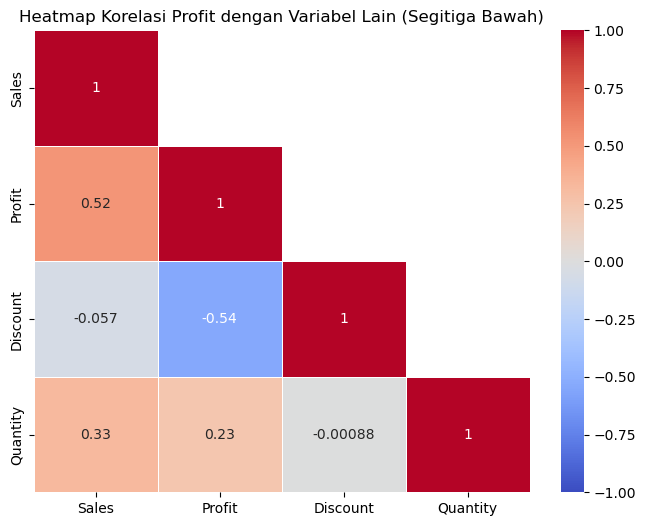

In [26]:

cols = ['Sales', 'Profit', 'Discount', 'Quantity']
# Hitung matriks korelasi
corr_matrix = df[cols].corr(method='spearman')

# Buat masker untuk segitiga atas
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Plot heatmap hanya untuk segitiga bawah
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, 
            mask=mask,  # Mengaplikasikan masker
            annot=True,  # Menampilkan nilai korelasi
            cmap='coolwarm',  # Warna biru (negatif) ke merah (positif)
            vmin=-1, vmax=1,  # Rentang korelasi (-1 hingga 1)
            linewidths=0.5,)
plt.title("Heatmap Korelasi Profit dengan Variabel Lain (Segitiga Bawah)")
plt.show()

**Insight:**

    - Hanya Sales (penjualan) dan Discount yang memberikan dampak cukup signifikan pada profit.
    - Dampak Sales terhadap Profit positif.
    - Dampak Diskon terhadap sales sangatlah kecil dimana berarti discount tidak dapat mendongkrak penjualan dengan baik.
    - Tidak sejalan dengan Sales, dampak discount terhadap profit sangatlah besar dan ke arah negatif.
    - discount membuat penjualan tidak terdorong namun membuat profit tergerus.
    - Tidak adanya korelasi yang kuat pada tabel quantity terhadap profit dan sales.

**Rekomendasi:**

    - Tinjau ulang penerapan discount agar berpengaruh baik terhadap profit dan sales.
    - Tinjau ulang cara penjualan based on quantity.


Bagaimana pola penjualan dan profit antara tahun 2020-2023?

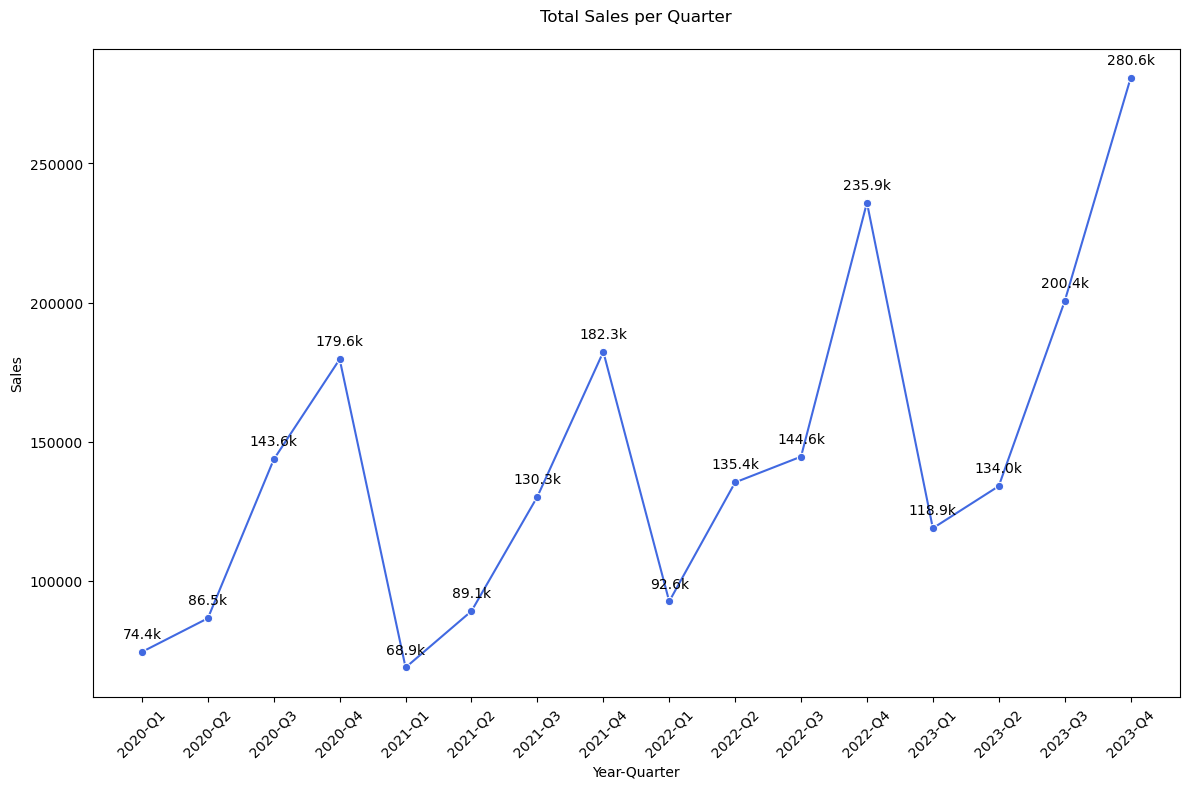

In [56]:
# Hitung median profit per Year-Quarter
quarterly_profit = df.groupby('Year-Quarter')['Sales'].sum().reset_index()

# Buat line plot
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=df.sort_values('Year-Quarter'), 
             x='Year-Quarter', 
             y='Sales',
             estimator='sum',
             marker='o',
             color='royalblue',
             ci=None)

for index, row in quarterly_profit.iterrows():
    # Konversi ke ribuan dan tambahkan 'k'
    sales_text = f'{row["Sales"]/1000:.1f}k' if row["Sales"] >= 1000 else f'{row["Sales"]:.0f}'
    
    ax.annotate(sales_text, 
                (row['Year-Quarter'], row['Sales']),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')

plt.xticks(rotation=45)
plt.title('Total Sales per Quarter', pad=20)
plt.tight_layout()
plt.show()

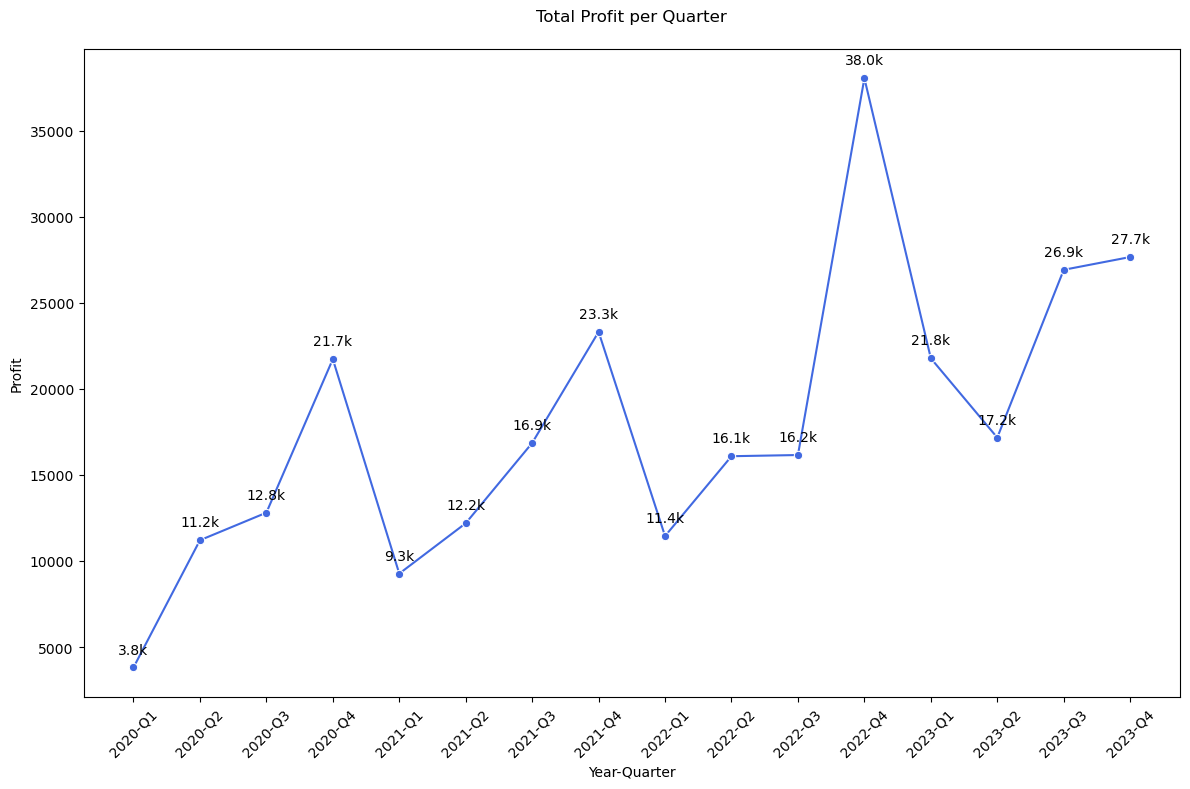

In [57]:
# Hitung median profit per Year-Quarter
quarterly_profit = df.groupby('Year-Quarter')['Profit'].sum().reset_index()

# Buat line plot
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=df.sort_values('Year-Quarter'), 
             x='Year-Quarter', 
             y='Profit',
             estimator='sum',
             marker='o',
             color='royalblue',
             ci=None)

for index, row in quarterly_profit.iterrows():
    # Konversi ke ribuan dan tambahkan 'k'
    profit_text = f'{row["Profit"]/1000:.1f}k' if row["Profit"] >= 1000 else f'{row["Profit"]:.0f}'
    
    ax.annotate(profit_text, 
                (row['Year-Quarter'], row['Profit']),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')

plt.xticks(rotation=45)
plt.title('Total Profit per Quarter', pad=20)
plt.tight_layout()
plt.show()

**Insgihts:**

    - Pola penjualan dan profit terlihat jelas pada tren Year-Quarter. 
    - Sales dari tahun 2020 menuju 2021 mengalami penurunan.
    - Profit mengalami kenaikan setiap tahun.
    - Sepanjang tahun 2020 - 2023 periode Q3 dan Q4 terbilang kuat (peak season).
    - Sepanjang tahun 2020 - 2023 periode Q1 dan Q2 terbilang lemah.

**Rekomendasi:**

    - Lakukan Seasonal Promo untuk membantu lemahnya penjualan di Q1 dan Q2 dan membantu mendongkrak penjualan di Q3 dan Q4.

Bagaimana keadaan penjualan dan profit per produk?

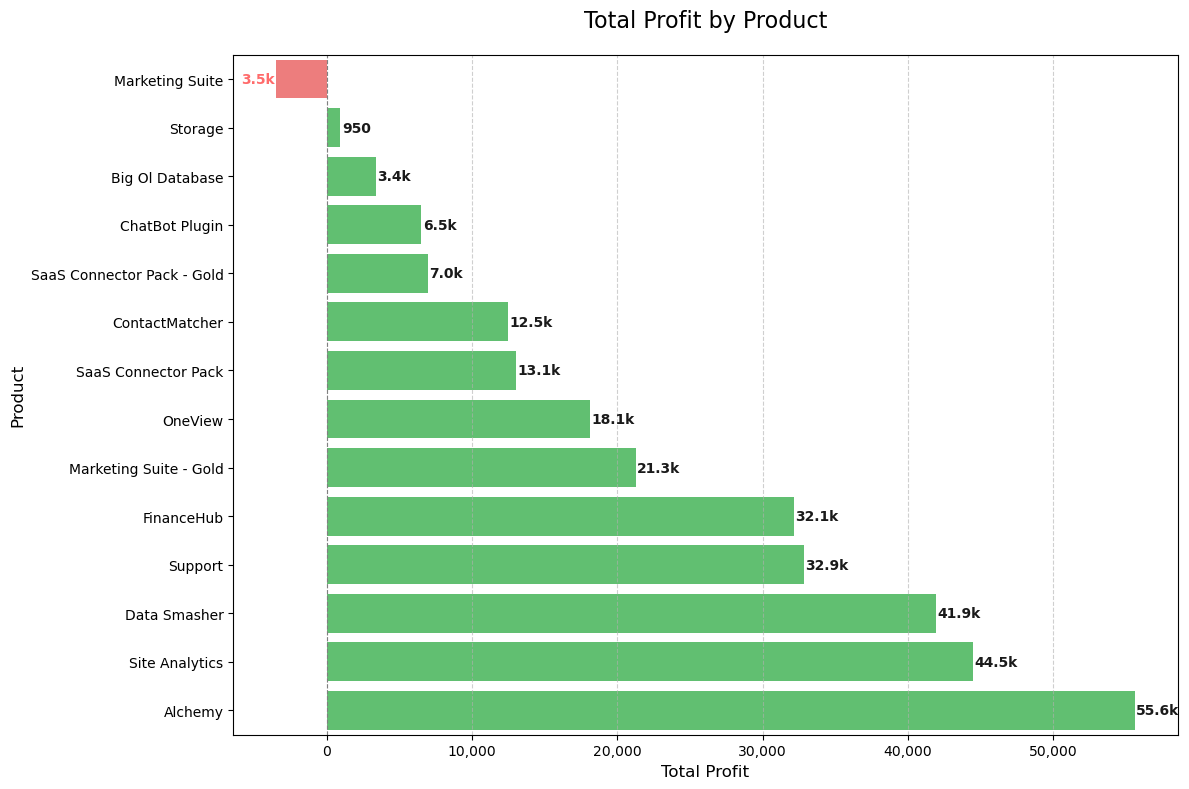

In [27]:
plt.figure(figsize=(12, 8))

# Create conditional colors
colors = ['#ff6b6b' if x < 0 else '#51cf66' for x in df.groupby('Product')['Profit'].sum().sort_values()]

# Create the bar plot
ax = sns.barplot(data=df,
                y='Product',
                x='Profit',
                estimator='sum',
                ci=None,
                palette=colors,
                order=df.groupby('Product')['Profit'].sum().sort_values().index)

# Add annotations
for p in ax.patches:
    width = p.get_width()
    if width < 0:
        offset = -1
        ha = 'right'
        color = '#ff6b6b'
        abs_width = abs(width)
    else:
        offset = 1
        ha = 'left'
        color = '#1a1a1a'
        abs_width = width
    
    # Format nilai dengan 'k' jika > 1000
    label = f'{abs_width/1000:,.1f}k' if abs_width > 1000 else f'{abs_width:,.0f}'
    
    ax.annotate(label,
                (width, p.get_y() + p.get_height()/2.),
                ha=ha, va='center',
                xytext=(offset, 0),
                textcoords='offset points',
                color=color,
                fontsize=10,
                fontweight='bold')
# Formatting
plt.title('Total Profit by Product', fontsize=16, pad=20)
plt.xlabel('Total Profit', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.8)  # Zero line
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Format x-axis as currency
ax.xaxis.set_major_formatter('{x:,.0f}')

plt.tight_layout()
plt.show()

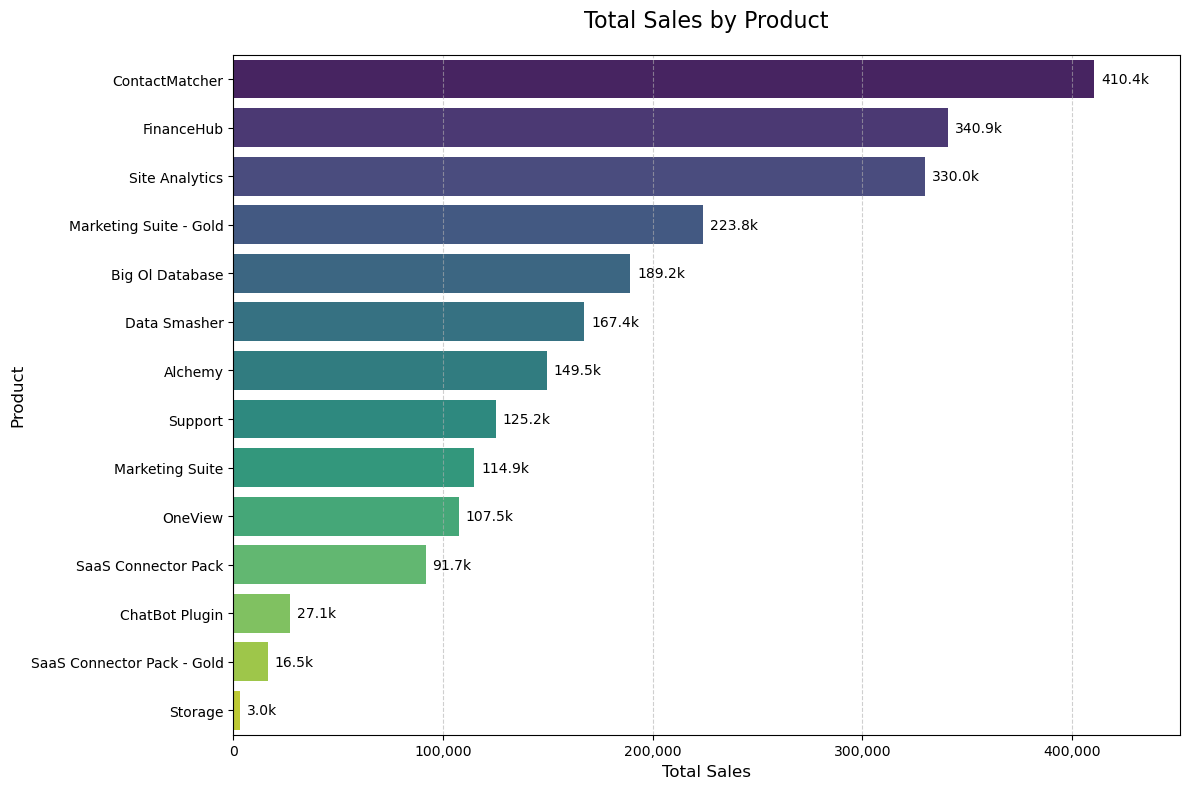

In [28]:
plt.figure(figsize=(12, 8))

# Urutkan produk berdasarkan total penjualan (dari terbesar ke terkecil)
product_order = df.groupby('Product')['Sales'].sum().sort_values(ascending=False).index

# Buat bar plot dengan pengurutan
ax = sns.barplot(data=df,
                y='Product',
                x='Sales',
                estimator='sum',
                ci=None,
                order=product_order,
                palette='viridis')

# Tambahkan anotasi
for p in ax.patches:
    width = p.get_width()
    # Format nilai dengan 'k' jika > 1000
    label = f'{width/1000:,.1f}k' if width > 1000 else f'{width:,.0f}'
    ax.annotate(label,
                (width, p.get_y() + p.get_height()/2.),
                ha='left',
                va='center',
                xytext=(5, 0),
                textcoords='offset points',
                fontsize=10)

# Formatting
plt.title('Total Sales by Product', fontsize=16, pad=20)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.xlim(0, df.groupby('Product')['Sales'].sum().max() * 1.1)  # Beri ruang untuk anotasi

# Format sumbu x sebagai mata uang

ax.xaxis.set_major_formatter('{x:,.0f}')

# Tambahkan grid
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Agar membantu perhitungan dapat dicari rasio profit terhadap sales

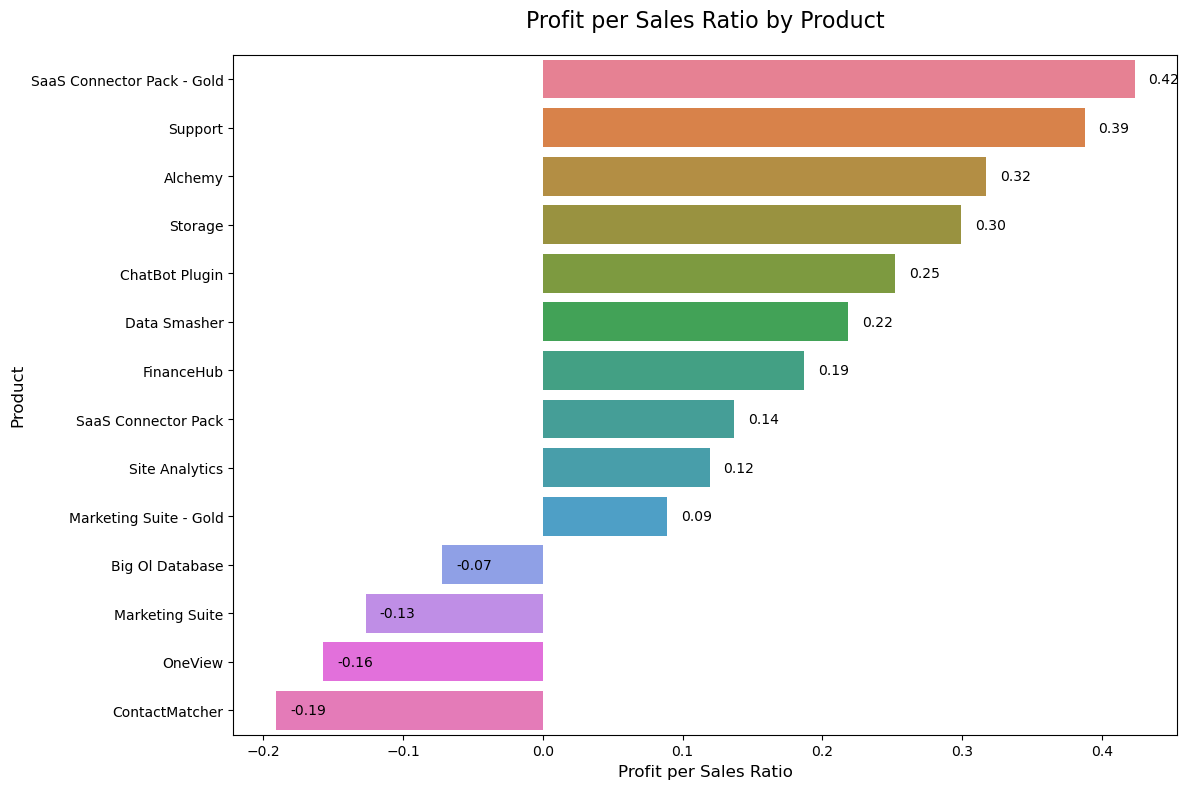

In [29]:

plt.figure(figsize=(12, 8))

# Definisi ratio
df_ratio = df.groupby('Product')['Profit perSales Ratio'].mean().reset_index().sort_values('Profit perSales Ratio', ascending=False)

# Save lagi file ketika menambahkan kolom baru
df.to_csv("Saas-Sales-Cleaned.csv")

# Membuat palet warna yang berbeda untuk setiap bar
palette = sns.color_palette("husl", len(df_ratio))

# Membuat barplot dengan warna berbeda
ax = sns.barplot(data=df_ratio,
                 x='Profit perSales Ratio',
                 y='Product',
                 palette=palette)

# Menambahkan anotasi untuk setiap bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.01,  # Posisi x (ditambahkan sedikit offset)
             p.get_y() + p.get_height()/2.,  # Posisi y (tengah bar)
             f'{width:.2f}',  # Nilai dengan 2 desimal
             ha='left', 
             va='center',
             fontsize=10)

# Menambahkan judul dan label
plt.title('Profit per Sales Ratio by Product', fontsize=16, pad=20)
plt.xlabel('Profit per Sales Ratio', fontsize=12)
plt.ylabel('Product', fontsize=12)

# Menyesuaikan layout
plt.tight_layout()
plt.show()

**Insights:**

    - Penyumbang profit terbesar dalam produk ialah Alchemy, Site Analythic, Data Smasher, Support dan Finance Hub.
    - Rata-rata ratio yang dihasilkan pada setiap transaksi per produk tertinggi iala Saas Connector Pack - Gold, Support, Alchemy, Storage, Chatbot Plugin
    - Marketing Suite adalah satu-satunya produk dengan profit negatif (-3.5k) meskipun sales-nya masih tinggi.
    - ContactMatcher: Penjualan tertinggi (410.4k) tapi rasio profit negatif (-0.19)


**Rekomendasi:**

    - Mulai fokuskan penjualan dan  marketing pada top 5 Ratio agar dapat menumbuhkan profit.
    - Pertimbangkan untuk stop penjualan atau evaluasi mendalam pada barang yang memiliki rata-rata ratio dibawah 0 (merugi) dan kembangkan produk yang berkaitan dengan top 5 ratio.
    - Perbaiki produk dengan rasio rendah, Kurangi diskon atau tingkatkan efisiensi produksi.
    - Lakukan bundling atau cross-sell untuk produk margin tinggi seperti Alchemy dan Support dengan produk populer.

***2. Bagaimana penerapan harga dan diskon yang terjadi?***

Dengan melihat penjelasan sebelumnya tentang profit dan sales, tabel heatmap mengatakan korelasi discount terhadap profit sangatlah kecil yang mengindikasikan ada kesalahan penerapan promo atau discount.

Bagaiamana distribusi diskon yang telah terjadi pada setiap quarter?

In [55]:
df.groupby('Year-Quarter')['Discount'].unique().reset_index()

,Year-Quarter,Discount
0,2020-Q1,"[0.2, 0.0, 0.7, 0.8, 0.4, 0.1, 0.5, 0.15, 0.6, 0.3]"
1,2020-Q2,"[0.0, 0.2, 0.7, 0.4, 0.8, 0.6, 0.3, 0.15, 0.32, 0.5, 0.1]"
2,2020-Q3,"[0.0, 0.2, 0.5, 0.4, 0.3, 0.8, 0.7, 0.45, 0.32, 0.6, 0.15, 0.1]"
3,2020-Q4,"[0.0, 0.2, 0.6, 0.3, 0.7, 0.1, 0.15, 0.8, 0.4, 0.5, 0.32]"
4,2021-Q1,"[0.0, 0.2, 0.5, 0.4, 0.7, 0.6, 0.8, 0.3, 0.1, 0.32]"
5,2021-Q2,"[0.0, 0.3, 0.2, 0.7, 0.8, 0.4, 0.1, 0.6, 0.5, 0.15, 0.45]"
6,2021-Q3,"[0.0, 0.5, 0.7, 0.2, 0.8, 0.3, 0.4, 0.6, 0.1, 0.15, 0.32]"
7,2021-Q4,"[0.45, 0.2, 0.8, 0.32, 0.3, 0.0, 0.7, 0.6, 0.1, 0.5, 0.15, 0.4]"
8,2022-Q1,"[0.2, 0.0, 0.4, 0.7, 0.3, 0.8, 0.32, 0.5, 0.6, 0.1]"
9,2022-Q2,"[0.0, 0.1, 0.2, 0.6, 0.5, 0.4, 0.7, 0.3, 0.8, 0.15]"


**Insights:**

    - Dari tabel diatas terlihat pemberian diskon diberikan secara massive setiap tahunnya tanpa ada pola yang jelas.

**Rekomendasi:**

    - Buat strategi marketing yang jelas terarah dan terukur agar pemberian diskon tidak terjadi secara acak yang akan mengakibtakan kerugian terhadap perusahaan.
    - Buat kalender diskon sebagai acuan promo.

Melihat pesebaran diskon yang tersemat pada setiap produk

In [54]:
df.groupby('Product')['Discount'].unique().reset_index()

,Product,Discount
0,Alchemy,"[0.2, 0.0, 0.4]"
1,Big Ol Database,"[0.4, 0.7, 0.0, 0.3, 0.5, 0.1, 0.2]"
2,ChatBot Plugin,"[0.0, 0.2]"
3,ContactMatcher,"[0.45, 0.2, 0.8, 0.0, 0.7, 0.5, 0.3, 0.4]"
4,Data Smasher,"[0.0, 0.2]"
5,FinanceHub,"[0.0, 0.3, 0.1, 0.2]"
6,Marketing Suite,"[0.0, 0.5, 0.32, 0.2, 0.15, 0.7, 0.3]"
7,Marketing Suite - Gold,"[0.2, 0.0]"
8,OneView,"[0.0, 0.8, 0.2, 0.1]"
9,SaaS Connector Pack,"[0.0, 0.2, 0.6]"


**Insights:**

    - Pemberian diskon besar (>=50%) disematkan pada 5 dari 14 produk  yang ada.
    - Pemberian diskon terlihat tidak terarah karena produk yang sepi peminat seperti storage yang mempunya rasio profit per sales besar namun penjualan paling sedikit hanya disematkan diskon sebesar 20%.

**Rekomendasi:**

    - Sematkan diskon besar hanya pada barang tertentu yang memang sepi peminat.
    - Berikan diskon besar hanya pada waktu tertentu.


Apakah penerapan discount atau promo mengacu pada harga dasar dan sales oriented?
Melihat variasi sales (harga) per produk per quantity dengan diskon yang diberikan

In [58]:
# Melihat Penetapan Harga Yang Diberikan
df_product = df.groupby(['Product','Quantity','Discount'])['Sales'].unique().reset_index()
df_product

,Product,Quantity,Discount,Sales
0,Alchemy,1,0.00,"[549.99, 599.99, 299.99]"
1,Alchemy,1,0.20,"[559.992, 439.992]"
2,Alchemy,2,0.00,"[599.98, 999.98, 1399.98, 1199.98]"
3,Alchemy,2,0.20,"[959.984, 1119.984, 479.984, 879.984, 799.984, 319.984]"
4,Alchemy,2,0.40,"[839.988, 659.988]"
5,Alchemy,3,0.00,"[1799.97, 899.97, 10499.97]"
6,Alchemy,3,0.20,"[1199.976, 479.976, 719.976]"
7,Alchemy,3,0.40,[899.982]
8,Alchemy,4,0.00,"[1999.96, 13999.96]"
9,Alchemy,4,0.20,"[11199.968, 959.968, 1439.968, 639.968]"


Analisa secara spesifik terhadap penjualan setiap produk yang terjual sebanyak 1 pcs dan penerapan diskon terhadap produk tersebut.

In [59]:
df_price = df.groupby(['Product', 'Discount', 'Quantity'])['Sales'].value_counts().reset_index()
df_price = df_price.query('Quantity == 1')

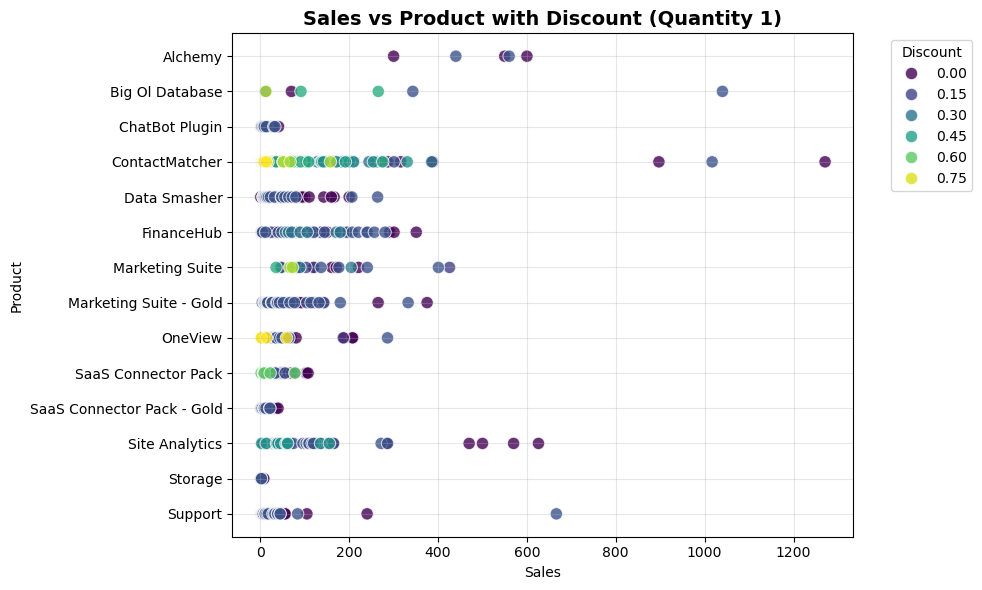

In [60]:

# Plot dasar
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_price,
    x='Sales',
    y='Product',
    hue='Discount',
    palette='viridis',
    s=80,
    alpha=0.8
)



# Tambahan estetika
plt.title("Sales vs Product with Discount (Quantity 1)", fontsize=14, fontweight="bold")
plt.xlabel("Sales")
plt.ylabel("Product")
plt.grid(alpha=0.3)
plt.legend(title="Discount", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


**Insights:**

    - Penetapan harga tidaklah konsisten di setiap produk.
    - Berdasarkan tabel ratio profit terhadap sales sebelumnya bisa dilihat bahwa product Big Ol Database mempunyai rata rata kerugian namun memiliki angka sales yang tinggi.
    - Perbedaan harga yang diberikan di produk, diskon dan kuantitas yang sama terlalu besar. seperti pada Big Ol Database dengan penjualan 3 produk pertransaksi dan diskon sebesar 40% nilai salesnya berada di angka antara 288 - 3059 atau berbeda 962.5%.
    - Dari tabel scatterplot diatas bisa dilihat timpangnya pemberian harga (angka sales).

**Rekomendasi:**

    - Buatlah harga pokok penjualan di setiap produk untuk menjadi acuan setiap transaksinya agar meningkatkan profit dan meminimalisir kerugian.
    - Maksimalkan produk yang laris di market dengan tidak memberikan promo atau diskon yang berlebihan.
    - Untuk meningkatkan sales pertimbangkan menjual produk secara bundle seperti contact matcher dengan chatbot plugin untuk menigkatkan sales dan daya tarik untuk produk yang sepi peminat di market.


Apakah yang terdampak hanya penjualan terhadap produk yang menggunakan diskon?

In [61]:
df.query('Profit == 0 and Discount == 0').head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Year,Year-Quarter,Profit perSales Ratio
563,AMER-2021-130736,2021-12-07,Caroline Burgess,Canada,Toronto,AMER,NAMER,J.P. Morgan Chase & Co.,1054,Finance,SMB,Storage,BGFLDMT8ZR,3.96,2,0.0,0.0,2021,2021-Q4,0.0
969,EMEA-2023-135279,2023-04-10,Jennifer Roberts,United Kingdom,London,EMEA,UKIR,Oracle,1072,Tech,Enterprise,Marketing Suite - Gold,X0EBXYPAX2,501.81,3,0.0,0.0,2023,2023-Q2,0.0
1154,EMEA-2020-136567,2020-12-20,Wanda Hardacre,Spain,Zaragoza,EMEA,EU-WEST,Costco Wholesale,1025,Retail,Enterprise,Marketing Suite - Gold,2HVGLU4UY0,122.48,2,0.0,0.0,2020,2020-Q4,0.0
1168,EMEA-2023-145226,2023-12-09,Molly Rees,United Kingdom,London,EMEA,UKIR,Goldman Sachs Group,1042,Finance,SMB,Marketing Suite - Gold,PU2PQZH7C8,272.94,3,0.0,0.0,2023,2023-Q4,0.0
1335,EMEA-2022-122133,2022-05-17,Melanie Dowd,Saudi Arabia,Dhahran,EMEA,MEA,Nissan Motor,1098,Transportation,SMB,Marketing Suite - Gold,2HUGWO68QY,552.56,4,0.0,0.0,2022,2022-Q2,0.0


In [62]:
df.query('Profit == 0 and Discount == 0').nunique()

Order ID                 29
Order Date               29
Contact Name             29
Country                  14
City                     18
Region                    3
Subregion                 8
Customer                 27
Customer ID              27
Industry                 10
Segment                   3
Product                   3
License                  30
Sales                    25
Quantity                  9
Discount                  1
Profit                    1
Year                      4
Year-Quarter             12
Profit perSales Ratio     1
dtype: int64

In [63]:
df.query('Profit == 0 and Discount == 0')['Quantity'].sum()

125

**Insights:**

    - Yang terdampak dengan tidak adanya penetapan harga dasar bukan hanya produk dengan diskon, namun produk tanpa diskon juga ikut terkena imbasnya.
    - Tidak adanya penetapan harga dasar mengakibatkan ada 29 transaksi berjumlah 125 produk  yang tidak memiliki profit walaupun diskon tidak diberikan.

**Rekomendasi:**

    - Penetapan harga dasar harus segera dilakukan agar kerugian tidak semakin membesar dan profit bisa di naikan. dengan adanya kasus 125 Produk terjual tanpa profit dan diskon ini mengakibatkan perusahaan tidak mendapatkan apa apa bahkan citra baik untuk engagement customer karena tidak memberikan diskon, jika ingin melakukan promosi dengan memberi harga yang relatif dibawah pasaran gunakanlah strategi promo dan diskon.
    - Perbaiki regulasi diskon yang diberikan kepada customer.

Penerapan diskon di setiap sub-region, apakah tepat sasaran?

In [53]:
df.groupby(['Region','Subregion'])['Discount'].value_counts().reset_index()

,Region,Subregion,Discount,count
0,AMER,LATAM,0.20,464
1,AMER,LATAM,0.00,445
2,AMER,LATAM,0.70,122
3,AMER,LATAM,0.40,67
4,AMER,LATAM,0.30,25
5,AMER,LATAM,0.10,18
6,AMER,LATAM,0.50,17
7,AMER,NAMER,0.00,1604
8,AMER,NAMER,0.20,851
9,AMER,NAMER,0.15,52


**Insights:**

    - Pemberian diskon besar tidak selalu dapat meningkatkan sales, terlihat dari data Region AMER Subregion LATAM walaupun diberikan diskon sebesar 70% sales hanya mencatatkan 122 produk(Akibat promo tidak terukur dan tidak tepat sasaran).
    - Region APJ dengan Subregion APAC dan IND tidak diberikan diskon dengan baik dan tidak terukur, pada Subregion APAC dengan pemberian diskon 30% hanya terjual sebanyak 11 Produk, Subregion IND sama sekali tidak pernah diberi diskon.

**Rekomendasi:**

    - Coba berikan diskon dan promo pengenalan kepada customer di wilayah yang masih tertinggal dalam angka sales seperti APJ untuk meningkatkan engagement konsumen.
    - Sematkan diskon pada barang yang memang dibutuhkan di Region dan perusahaan bersangkutan agar lebih terukur dan terarah.
    - Pertahankan strategi diskon rendah di pasar besar (NAMER, EU-WEST) karena terbukti menghasilkan volume besar tanpa margin tergerus.
    - Pasar APJ (terutama ANZ dan JAPN) responsif terhadap diskon tinggi — bisa dimanfaatkan untuk kampanye penetrasi agresif.

***3. Bagaimana cara mengoptimalkan customer yang ada?***

Optimalisasi customer sangatlah penting dengan target market yang lebih jelas dan dipadukan dengan product dan style tersendiri membuat company dapat mempunyai brand image yang mudah diingat dan kuat, selain itu optimalisasi customer dapat menjadikan customer loyal dan dapat memompa profit perusahaan dengan baik.


Mencari pola customer by segment

Profit terhadap segment tertinggi setiap tahunnya.

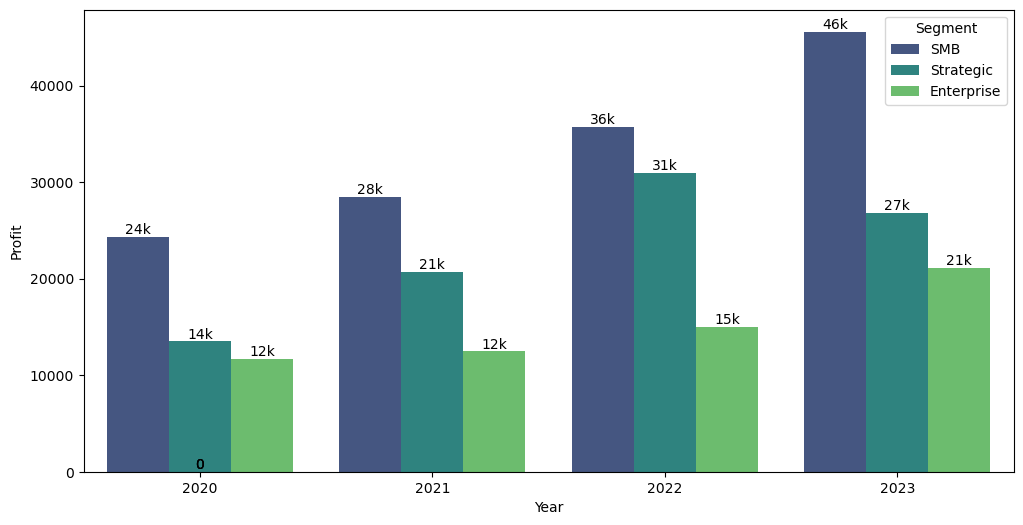

In [38]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df,
            x='Year',
            y='Profit',
            hue='Segment',
            palette='viridis',
            estimator='sum',
            ci=None)
for p in ax.patches:
    height = p.get_height()
    # Format ribuan jika >= 1000, else tampilkan angka biasa
    label = f"{height/1000:.0f}k" if height >= 1000 else f"{height}"
    ax.annotate(label, 
               (p.get_x() + p.get_width() / 2, height),
               ha='center', va='center',
               xytext=(0, 5),
               textcoords='offset points')

Sales terhadap segment tertinggi setiap tahunnya

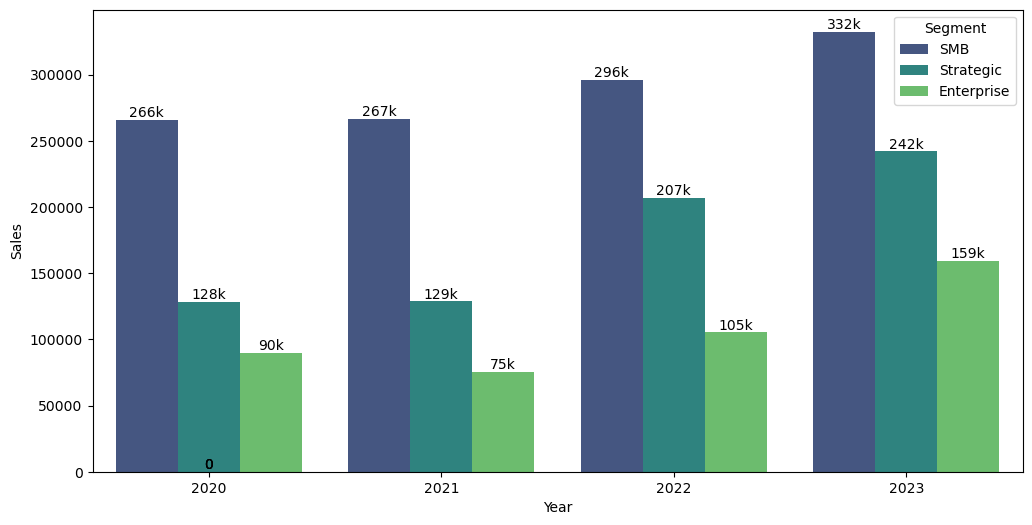

In [39]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df,
            x='Year',
            y='Sales',
            hue='Segment',
            palette='viridis',
            estimator='sum',
            ci=None)
for p in ax.patches:
    height = p.get_height()
    # Format ribuan jika >= 1000, else tampilkan angka biasa
    label = f"{height/1000:.0f}k" if height >= 1000 else f"{height}"
    ax.annotate(label, 
               (p.get_x() + p.get_width() / 2, height),
               ha='center', va='center',
               xytext=(0, 5),
               textcoords='offset points')

Pesebaran Segment

<Figure size 800x600 with 0 Axes>

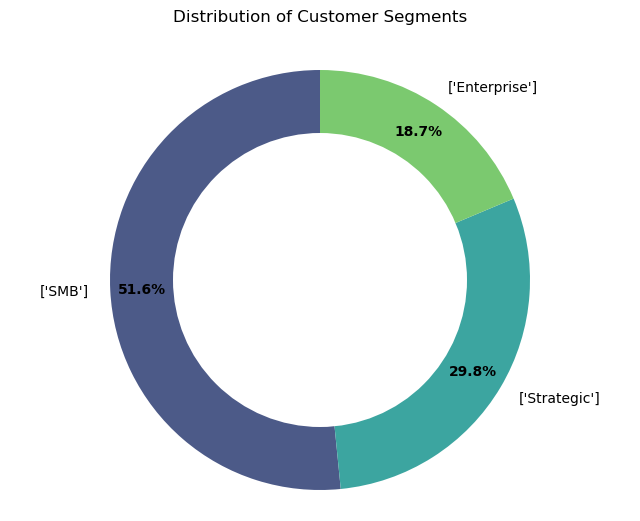

In [40]:
#Mencari Jumlah Customer berdasarkan Segment
df_segment = df.groupby(['Customer','Contact Name'])['Segment'].unique().reset_index()
df_segment['Segment'].value_counts()

plt.figure(figsize=(8, 6))
# Hitung value counts
segment_counts = df_segment['Segment'].value_counts()

# Warna untuk setiap segmen (bisa disesuaikan)
colors = ['#4C5A88',  # Biru tua untuk SMB
          '#3CA5A0',  # Biru kehijauan untuk Strategic
          '#7BC96F']  # Hijau muda untuk Enterprise

# Buat figure dan axis
fig, ax = plt.subplots(figsize=(8, 6))

# Buat pie chart (donut)
wedges, texts, autotexts = ax.pie(segment_counts, 
                                 labels=segment_counts.index,
                                 autopct='%1.1f%%',
                                 startangle=90,
                                 colors=colors,
                                 wedgeprops=dict(width=0.4),  # Ini yang membuat donut
                                 pctdistance=0.85)

# Buat lingkaran di tengah untuk efek donut
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Atur aspect ratio agar pie chart terlihat bulat
ax.axis('equal')

# Tambahkan judul
plt.title('Distribution of Customer Segments', pad=20)

# Atur ukuran font label
plt.setp(texts, size=10)
plt.setp(autotexts, size=10, weight='bold')

# Tampilkan plot
plt.show()

**Insight:**

    - Kontribusi Segment tertinggi ialah SMB (51.6%) dari seluruh pelanggan (grafik donat).
    - Konsumen utama CloudAxis ada di sektor SMB.
    - Konsumen terendah CloudAxis ada di sektor Enterprise.
    - Segment SMB terus mengalami pertumbuhan sales yang stabil dan signifikan dari 266k (2020) ke 332k (2023).

**Rekomendasi:**

    - Ekspansi customer SMB ke wilayah lain
    - Mulai riset ke sektor Enterprise dan Strategic dengan melihat produk yang dibutuhkan di segment tersebut.
    - Efisiensi/margin perlu dikaji, terutama di segmen Strategic yang mengalami penurunan profit di tengah naiknya penjualan.
    - Lanjutkan investasi dalam layanan, dukungan, dan produk khusus SMB
    - Perkuat retensi pelanggan di segmen SMB karena sudah terbukti menguntungkan.


Pola pada Customer

Top 10 Customer by Profit

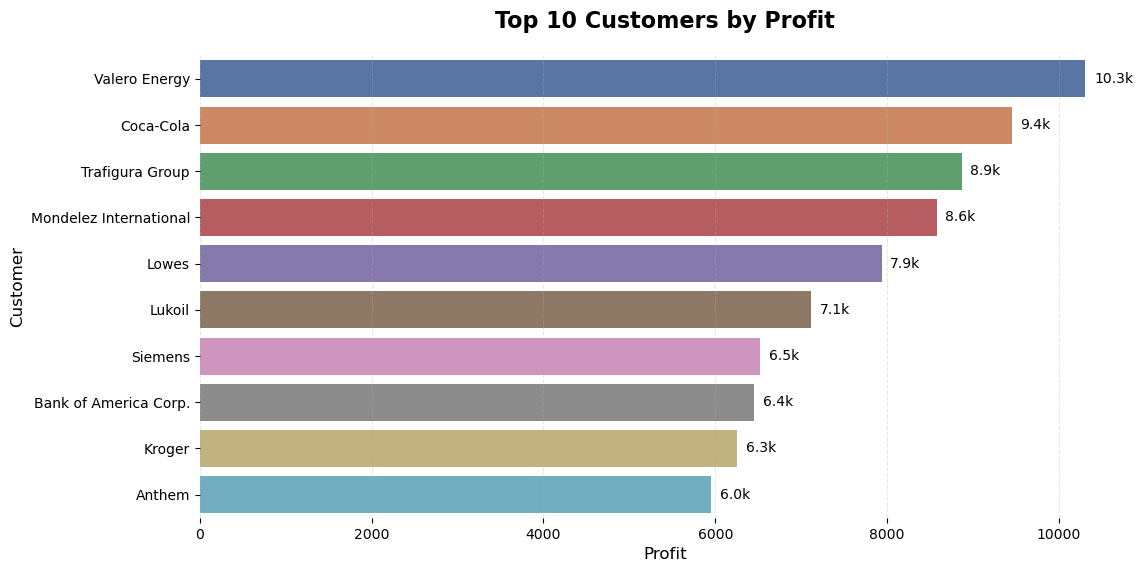

In [41]:

df_customer_top10_profit = df.groupby('Customer')['Profit'].sum().reset_index().sort_values('Profit', ascending=False).head(10)
# Membuat figure dan axes
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_customer_top10_profit, y='Customer', x='Profit', palette='deep')

# Menambahkan anotasi nilai profit di ujung setiap bar
for i, (profit, customer) in enumerate(zip(df_customer_top10_profit['Profit'], df_customer_top10_profit['Customer'])):
    label = f"{profit/1000:.1f}k" if abs(profit) >= 1000 else f"{profit:,.0f}"
    ax.text(profit + 100, i, label, 
            va='center', ha='left', 
            fontsize=10, color='black')

# Menambahkan judul dan label
plt.title('Top 10 Customers by Profit', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Profit', fontsize=12)
plt.ylabel('Customer', fontsize=12)
sns.despine(left=True, bottom=True)
ax.xaxis.grid(True, linestyle='--', alpha=0.3)

# Menyesuaikan layout
plt.show()


Top 10 Customer by Sales

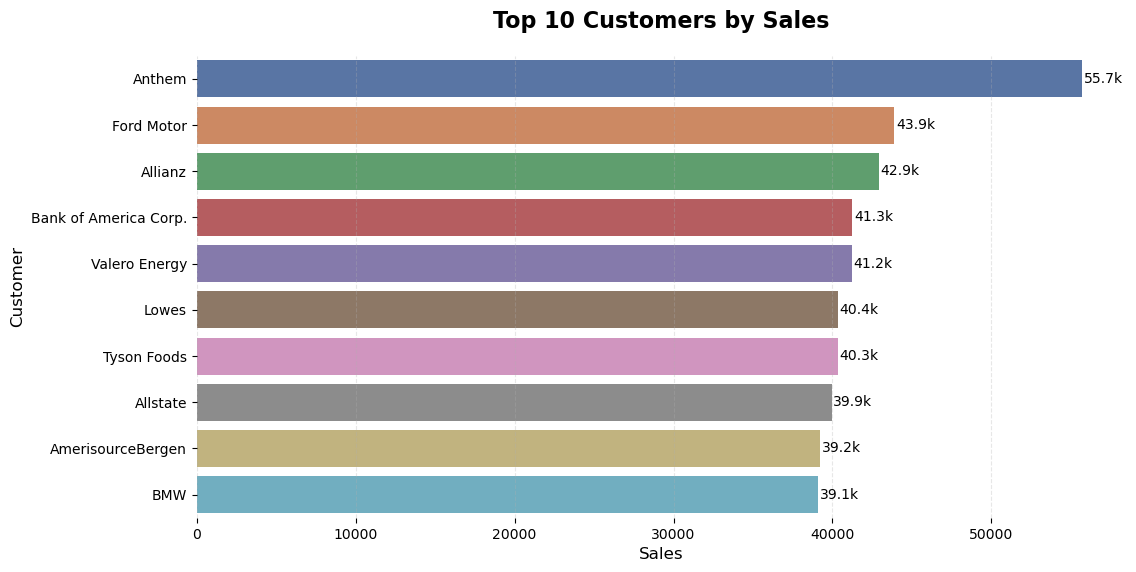

In [42]:

df_customer_top10_sales = df.groupby('Customer')['Sales'].sum().reset_index().sort_values('Sales', ascending=False).head(10)


# Menambahkan anotasi nilai sales
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_customer_top10_sales, y='Customer', x='Sales', palette='deep')

# Menambahkan anotasi nilai sales dalam format ribuan
for i, (sales, customer) in enumerate(zip(df_customer_top10_sales['Sales'], df_customer_top10_sales['Customer'])):
    label = f"{sales/1000:.1f}k" if abs(sales) >= 1000 else f"{sales:,.0f}"
    ax.text(sales + 100, i, label, 
            va='center', ha='left', 
            fontsize=10, color='black')

# Formatting
plt.title('Top 10 Customers by Sales', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Customer', fontsize=12)
sns.despine(left=True, bottom=True)
ax.xaxis.grid(True, linestyle='--', alpha=0.3)


plt.show()

Bottom 10 Customer

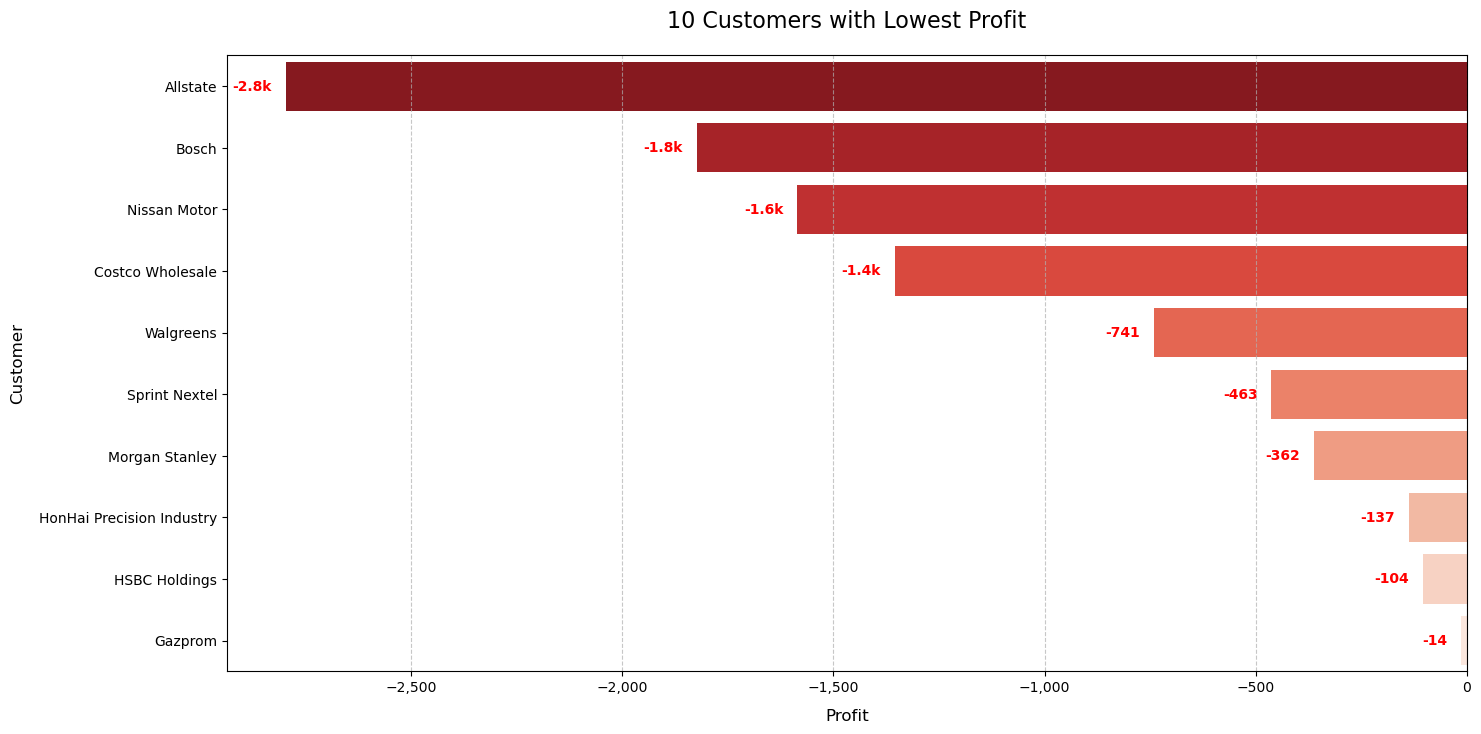

In [43]:
df_customer_bottom10_profit = df.groupby('Customer')['Profit'].sum().reset_index().sort_values('Profit', ascending=True).head(10)
plt.figure(figsize=(16,8))

# Buat palette menarik (contoh: gradient merah untuk profit negatif)
palette = sns.color_palette("Reds_r", len(df_customer_bottom10_profit))

# Buat bar plot
ax = sns.barplot(data=df_customer_bottom10_profit,
                y='Customer',
                x='Profit',
                palette=palette,
                ci=None,
                saturation=0.8)

# Tambahkan anotasi
for p in ax.patches:
    width = p.get_width()
    
    # Determine annotation settings
    offset = -10 if width < 0 else 10
    ha = 'right' if width < 0 else 'left'
    color = 'red' if width < 0 else 'black'
    
    # Format the label (use 'k' for thousands)
    abs_width = abs(width)
    if abs_width >= 1000:
        label = f'{width/1000:,.1f}k'.replace('.0k', 'k')  # Remove .0 if no decimal
    else:
        label = f'{width:,.0f}'
    
    # Add annotation
    ax.annotate(label,
                (width, p.get_y() + p.get_height()/2.),
                ha=ha, va='center',
                xytext=(offset, 0),
                textcoords='offset points',
                color=color,
                fontsize=10,
                fontweight='bold')
# Format sumbu X
ax.xaxis.set_major_formatter('{x:,.0f}')
plt.xlabel('Profit', fontsize=12, labelpad=10)
plt.ylabel('Customer', fontsize=12, labelpad=10)
plt.title('10 Customers with Lowest Profit', fontsize=16, pad=20)

# Garis vertikal di x=0 untuk memisahkan profit positif/negatif
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)

# Atur grid
ax.grid(axis='x', linestyle='--', alpha=0.7)



plt.show()

Mencari perusahaan mana yang menjadi customer dengan cabang terbanyak (customer terbanyak per perusahaan)

In [44]:
df.groupby('Customer')['City'].nunique().reset_index().head(10).sort_values('City', ascending=False)

,Customer,City
4,Allianz,54
8,American Express,45
7,Amazon,43
2,Aetna,41
9,AmerisourceBergen,41
5,Allstate,39
0,AT&T,38
3,Airbus,38
1,Abbott Laboratories,18
6,Alphabet,17


**Insights:**

    - Dari 10 Customer terbanyak per perusahaan hanya 3 perusahaan (Allstate, Allianz, AmerisourceBergen) yang bisa meraih top 10 sales dan hanya 1 perusahaan (Siemens) yang bisa menembus top 1 profit.
    - Dari 10 Perusahaan dengan sales tertinggi hanya ada 4 perusahaan pada kategori perusahaan dengan profit tertinggi.
    - Dari 10 Customer terbanyak per perusahaan ada 1 perusahaan (Allstate) yang menjadi customer dengan kerugian tertinggi dengan angka kerugian sebesar 2800 walaupun menjadi salah satu customer dengan sales tertinggi.
    - Bottom 10 Customer berdasarkan profit mencatatkan kerugian semua.

**Rekomendasi:**

    - Strategi penjualan harus ditinjau ulang karena gagal mengkonversi customer menjadi sales (hanya 30% dari top 10 perusahaan dengan customer terbanyak menjadi top 10 sales) tak hanya gagal menjadi sales salah satu top 10 perusahaan dengan customer terbanyak menjadi customer dengan kerugian terbesar yang dimana gagal mengubah customer menjadi profit.
    - Pertimbangkan untuk membatasi penjualan yang merugikan kepada bottom 10 profit perusahaan.
    - Prioritaskan dan Pertahankan Valero Energy, Lowes, Bank of America Corp.
    - Evaluasi struktur harga untuk pelanggan high-sales-low-profit (misalnya, Anthem, Ford Motor) dengan menawarkan paket bernilai tambah (up-selling) atau menyesuaikan diskon.
    - Analisis Akar Masalah: Identifikasi apakah kerugian berasal dari diskon, biaya logistik, atau faktor lain.
    - Minimum Order Quantity (MOQ): Tetapkan batas minimal pembelian untuk menutupi biaya.

Mencari nilai CLV Top 10 dan Bottom 10

Overall CLV Metrics:
Average Purchase Value: $458.61
Purchase Frequency: 50.60 orders per customer
Customer Value: $23,204.05
Average Customer Lifespan: 3 years
Estimated CLV: $69,612.15

Top 10 Customers by CLV:
             Customer         CLV  Profit-based CLV
               Anthem 167157.6300        17859.6114
           Ford Motor 131679.1272        12032.2986
              Allianz 128712.5010        16595.6502
Bank of America Corp. 123767.8413        19349.5662
        Valero Energy 123661.2564        30925.8891
                Lowes 121080.4890        23812.4745
          Tyson Foods 120979.0320         5071.7325
             Allstate 119824.9200        -8388.8805
    AmerisourceBergen 117704.2830        12608.6472
                  BMW 117251.3700        17844.2979

Bottom 10 Customers by CLV:
           Customer        CLV  Profit-based CLV
            Gazprom 16208.7060          -41.9085
          Citigroup 18397.5630         1422.9963
            Safeway 19899.4110         

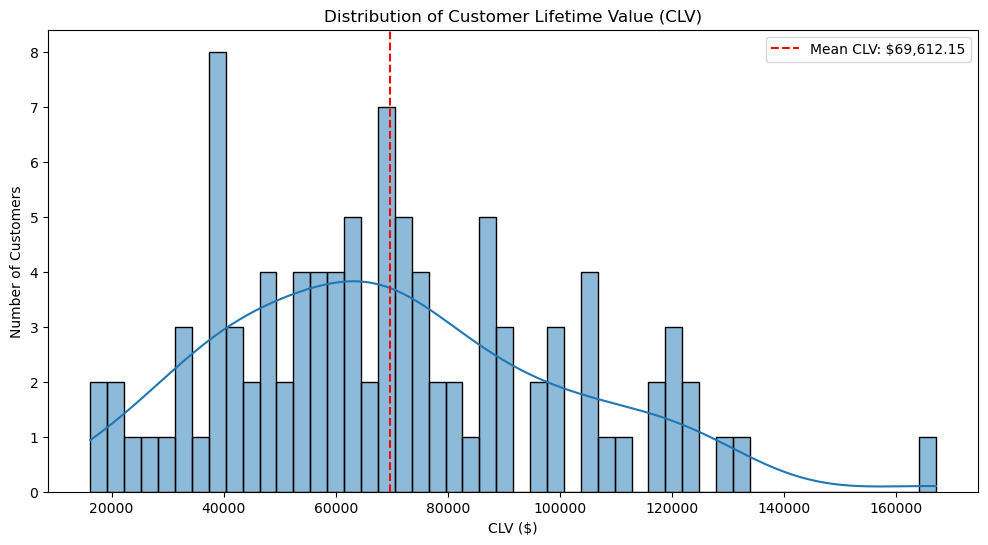

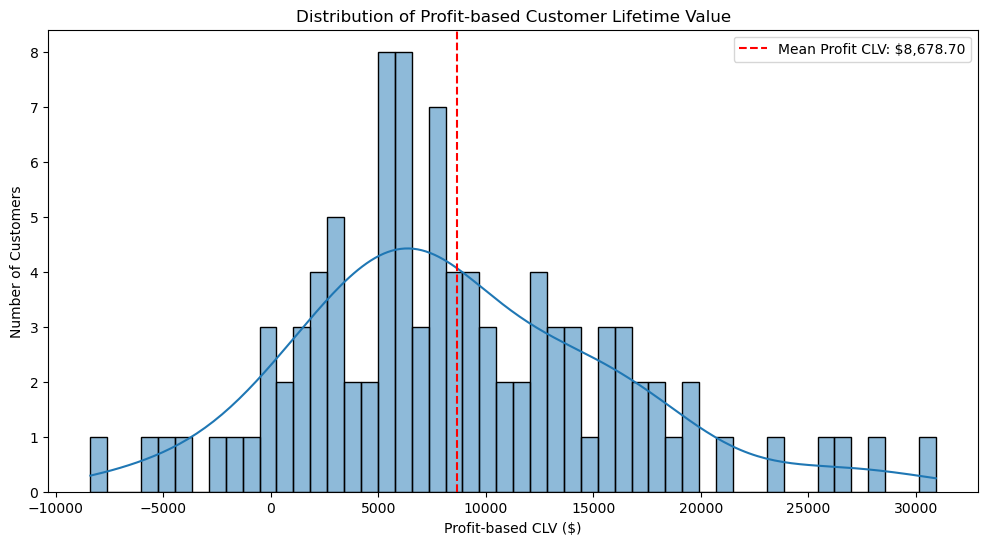


Customer Segmentation by CLV:
             Customer Count            CLV  Profit-based CLV  \
CLV Segment                                                    
Low                      25   34578.495972       4163.207928   
Medium                   25   57649.459188       5605.091544   
High                     24   75973.256837       9213.849525   
Very High                25  110501.821512      15754.047588   

             Purchase Frequency  
CLV Segment                      
Low                      33.240  
Medium                   45.440  
High                     55.125  
Very High                68.760  


In [45]:

# Calculate CLV metrics

## 1. Calculate Average Purchase Value
total_sales = df['Sales'].sum()
total_orders = df['Order ID'].nunique()
avg_purchase_value = total_sales / total_orders

## 2. Calculate Purchase Frequency
total_customers = df['Customer ID'].nunique()
purchase_frequency = total_orders / total_customers

## 3. Calculate Customer Value
customer_value = avg_purchase_value * purchase_frequency

## 4. Estimate Average Customer Lifespan (in years)
# For SaaS, typical customer lifespan is 3-5 years. We'll use 3 years as a conservative estimate.
avg_customer_lifespan = 3

## 5. Calculate CLV
clv = customer_value * avg_customer_lifespan

# Create a DataFrame to store CLV by customer
customer_data = df.groupby(['Customer ID', 'Customer']).agg({
    'Order ID': 'nunique',
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

customer_data.rename(columns={'Order ID': 'Purchase Frequency', 
                             'Sales': 'Total Revenue', 
                             'Profit': 'Total Profit'}, inplace=True)

# Calculate metrics per customer
customer_data['Avg Purchase Value'] = customer_data['Total Revenue'] / customer_data['Purchase Frequency']
customer_data['Customer Value'] = customer_data['Avg Purchase Value'] * customer_data['Purchase Frequency']
customer_data['CLV'] = customer_data['Customer Value'] * avg_customer_lifespan

# Add Profit-based CLV (more accurate for business decisions)
customer_data['Avg Profit per Order'] = customer_data['Total Profit'] / customer_data['Purchase Frequency']
customer_data['Profit-based CLV'] = customer_data['Avg Profit per Order'] * customer_data['Purchase Frequency'] * avg_customer_lifespan

# Display overall CLV metrics
print("Overall CLV Metrics:")
print(f"Average Purchase Value: ${avg_purchase_value:,.2f}")
print(f"Purchase Frequency: {purchase_frequency:.2f} orders per customer")
print(f"Customer Value: ${customer_value:,.2f}")
print(f"Average Customer Lifespan: {avg_customer_lifespan} years")
print(f"Estimated CLV: ${clv:,.2f}\n")

# Display top 10 customers by CLV
top_10_clv = customer_data.sort_values('CLV', ascending=False).head(10)
print("Top 10 Customers by CLV:")
print(top_10_clv[['Customer', 'CLV', 'Profit-based CLV']].to_string(index=False))

# Display bottom 10 customers by CLV
bottom_10_clv = customer_data.sort_values('CLV').head(10)
print("\nBottom 10 Customers by CLV:")
print(bottom_10_clv[['Customer', 'CLV', 'Profit-based CLV']].to_string(index=False))

# Visualize CLV distribution
plt.figure(figsize=(12, 6))
sns.histplot(customer_data['CLV'], bins=50, kde=True)
plt.title('Distribution of Customer Lifetime Value (CLV)')
plt.xlabel('CLV ($)')
plt.ylabel('Number of Customers')
plt.axvline(x=customer_data['CLV'].mean(), color='r', linestyle='--', label=f'Mean CLV: ${customer_data["CLV"].mean():,.2f}')
plt.legend()
plt.show()

# Visualize Profit-based CLV distribution
plt.figure(figsize=(12, 6))
sns.histplot(customer_data['Profit-based CLV'], bins=50, kde=True)
plt.title('Distribution of Profit-based Customer Lifetime Value')
plt.xlabel('Profit-based CLV ($)')
plt.ylabel('Number of Customers')
plt.axvline(x=customer_data['Profit-based CLV'].mean(), color='r', linestyle='--', label=f'Mean Profit CLV: ${customer_data["Profit-based CLV"].mean():,.2f}')
plt.legend()
plt.show()

# Segment customers by CLV
customer_data['CLV Segment'] = pd.qcut(customer_data['CLV'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Analyze segments
segment_analysis = customer_data.groupby('CLV Segment').agg({
    'Customer ID': 'count',
    'CLV': 'mean',
    'Profit-based CLV': 'mean',
    'Purchase Frequency': 'mean'
}).rename(columns={'Customer ID': 'Customer Count'})

print("\nCustomer Segmentation by CLV:")
print(segment_analysis)

In [46]:
top_10_clv

,Customer ID,Customer,Purchase Frequency,Total Revenue,Total Profit,Avg Purchase Value,Customer Value,CLV,Avg Profit per Order,Profit-based CLV
28,1029,Anthem,58,55719.2100,5953.2038,960.676034,55719.2100,167157.6300,102.641445,17859.6114
8,1009,Ford Motor,103,43893.0424,4010.7662,426.146043,43893.0424,131679.1272,38.939478,12032.2986
77,1080,Allianz,102,42904.1670,5531.8834,420.629088,42904.1670,128712.5010,54.234151,16595.6502
10,1011,Bank of America Corp.,65,41255.9471,6449.8554,634.706878,41255.9471,123767.8413,99.228545,19349.5662
90,1093,Valero Energy,58,41220.4188,10308.6297,710.696876,41220.4188,123661.2564,177.734995,30925.8891
58,1060,Lowes,58,40360.1630,7937.4915,695.864879,40360.1630,121080.4890,136.853302,23812.4745
85,1088,Tyson Foods,87,40326.3440,1690.5775,463.521195,40326.3440,120979.0320,19.431925,5071.7325
2,1003,Allstate,61,39941.6400,-2796.2935,654.780984,39941.6400,119824.9200,-45.840877,-8388.8805
6,1007,AmerisourceBergen,68,39234.7610,4202.8824,576.981779,39234.7610,117704.2830,61.807094,12608.6472
37,1039,BMW,56,39083.7900,5948.0993,697.924821,39083.7900,117251.3700,106.216059,17844.2979


In [47]:
bottom_10_clv

,Customer ID,Customer,Purchase Frequency,Total Revenue,Total Profit,Avg Purchase Value,Customer Value,CLV,Avg Profit per Order,Profit-based CLV
26,1027,Gazprom,23,5402.9020,-13.9695,234.908783,5402.9020,16208.7060,-0.607370,-41.9085
19,1020,Citigroup,13,6132.5210,474.3321,471.732385,6132.5210,18397.5630,36.487085,1422.9963
76,1079,Safeway,20,6633.1370,472.4582,331.656850,6633.1370,19899.4110,23.622910,1417.3746
11,1012,Berkshire Hathaway,25,7100.9290,812.7311,284.037160,7100.9290,21302.7870,32.509244,2438.1933
57,1059,Tesco,24,8173.2260,1689.7108,340.551083,8173.2260,24519.6780,70.404617,5069.1324
38,1040,General Electric,22,8637.7130,687.1512,392.623318,8637.7130,25913.1390,31.234145,2061.4536
17,1018,Petrobras,26,9628.4310,184.0959,370.324269,9628.4310,28885.2930,7.080612,552.2877
33,1034,Exxon Mobil,36,10582.8080,227.1131,293.966889,10582.8080,31748.4240,6.308697,681.3393
40,1042,Goldman Sachs Group,57,10831.8255,2516.4698,190.032026,10831.8255,32495.4765,44.148593,7549.4094
98,1101,Banco Santander,36,11065.0582,604.4772,307.362728,11065.0582,33195.1746,16.791033,1813.4316


**Insights:**

    - Anthem memiliki CLV tertinggi ($167,157.63) dan profitabilitas tinggi ($17,859.61).
    - Valero Energy memiliki profitabilitas tertinggi ($30,925.89) meskipun CLV-nya tidak paling tinggi.
    - Allstate memiliki profitabilitas negatif (-$8,388.88), yang menunjukkan bahwa meskipun CLV-nya tinggi, biaya untuk melayani pelanggan ini mungkin melebihi pendapatannya.
    - Gazprom memiliki CLV rendah ($16,208.71) dan profitabilitas negatif (-$41.91), menunjukkan kerugian.
    - Exxon Mobil dan Goldman Sachs memiliki CLV lebih tinggi (>$30,000) tetapi profitabilitas relatif rendah dibandingkan CLV-nya.

**Rekomendasi:**

    - Pertahankan hubungan dengan pelanggan seperti Anthem, Ford Motor, dan Allianz karena mereka memberikan nilai jangka panjang yang signifikan.
    - Pelanggan seperti Gazprom dan Petrobras mungkin tidak menguntungkan. Pertimbangkan untuk mengoptimalkan layanan atau menaikkan harga untuk meningkatkan profitabilitas.
    - Untuk pelanggan dengan profitabilitas negatif (Allstate), evaluasi biaya layanan.
    - Tingkatkan frekuensi pembelian atau nilai transaksi rata-rata melalui program loyalitas atau penawaran bundling.
    - Fokus pada pelanggan dengan profit-based CLV tinggi, bukan hanya CLV kasar, untuk strategi pertumbuhan berkelanjutan.

**4. Apakah ada ruang untuk melakukan ekspansi?**

Distribusi Sales terhadap Region

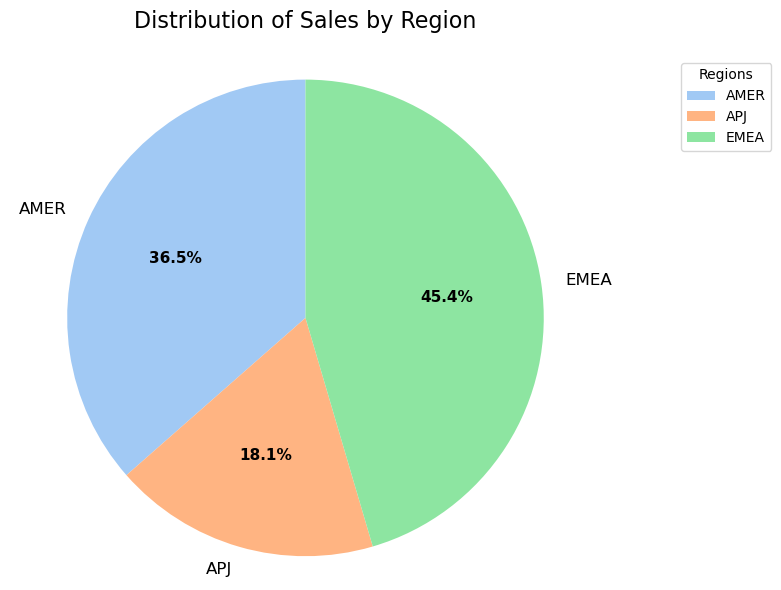

In [51]:
# Hitung total sales per region
region_sales = df.groupby('Region')['Sales'].sum()

# Buat pie chart
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(region_sales, 
                                   labels=region_sales.index,
                                   autopct='%.1f%%',
                                   startangle=90,
                                   colors=sns.color_palette('pastel'),
                                   textprops={'fontsize': 12})

# Tambahkan judul
plt.title('Distribution of Sales by Region', fontsize=16, pad=20)

# Format label persentase
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

# Tambahkan legenda
plt.legend(patches, 
           region_sales.index,
           title='Regions',
           loc='upper right',
           bbox_to_anchor=(1.3, 1))

# Pastikan pie chart berbentuk lingkaran sempurna
plt.axis('equal')

plt.tight_layout()
plt.show()

**Insights:**

    - EMEA (Europe, Middle East, and Africa) merupakan wilayah dengan kontribusi penjualan terbesar, yaitu 45.4%. Ini menunjukkan bahwa pasar di wilayah ini sangat penting bagi bisnis dan mungkin menjadi fokus utama strategi pemasaran atau ekspansi.
    - APJ hanya menyumbang 18,1% dari total penjualan.

**Rekomendasi:**

    - APJ hanya menyumbang 18,1% dari total penjualan. Angka ini relatif kecil, sehingga APJ adalah kandidat utama untuk ekspansi agresif (market development).
    - Lakukan analisis lebih mendalam tentang faktor-faktor yang memengaruhi penjualan di masing-masing wilayah.
    - Pertimbangkan strategi pemasaran atau distribusi yang lebih agresif untuk APJ jika ingin meningkatkan kontribusinya.

In [78]:
df_region = df.groupby(['Region','Subregion'])['Segment'].value_counts().reset_index()
df_region.groupby(['Region','Segment'])['count'].sum()

Region  Segment   
AMER    Enterprise     654
        SMB           1918
        Strategic     1093
APJ     Enterprise     385
        SMB           1093
        Strategic      632
EMEA    Enterprise     744
        SMB           2180
        Strategic     1295
Name: count, dtype: int64

**Insights:**

    - Segment SMB(Market Utama) di wilayah APJ terbilang rendah dibandingkan dengan 2 wilayah lainnya.
    - Segment SMB di AMER hanya terpaut dibawah sedikit di banding EMEA (Penyumbang sales terbesar).

**Rekomendasi:**

    - Untuk memulai ekspansi bisa difokuskan terlebih dahulu market SMB di wilayah APJ.
    - Optimalisasi di wilayah AMER sangat memungkinkan merujuk pada perbandingan customer SMB(segment utama) dan sales yang dihasilkan diantara wilayah AMER dan EMEA.

Distribusi Sales by SubRegion

In [52]:
import plotly.express as px

# Agregasi data
df_grouped = df.groupby(['Subregion', 'Region'], as_index=False)['Sales'].sum()

# Treemap
fig = px.treemap(
    df_grouped,
    path=['Region', 'Subregion'],
    values='Sales',
    color='Sales',
    color_continuous_scale='Blues',
    title='Treemap Penjualan per Subregion dan Region'
)

fig.show()


**Insight:**

    - Distribusi Penjualan Tidak Merata, Subregion APAC menonjol dengan penjualan tertinggi (500k).
    - Subregion seperti LATAM, JAPN, ANZ, dan IND memiliki penjualan lebih rendah (100k–200k), menunjukkan potensi pengembangan yang belum tergarap maksimal.

**Rekomendasi:**

    - Perlu dorongan kuat di India dan APAC (Asia Tenggara) dengan strategi harga kompetitif.
    - Perkuat Penetrasi dengan memberikan insentif atau kampanye pemasaran khusus untuk LATAM, ANZ, dan IND yang masih rendah.
    - Identifikasi hambatan di subregion dengan penjualan rendah (mis., logistik, persaingan, atau kurangnya brand awareness).


***Summary***
---
Rangkuman Insights dan Rekomendasi**  

#### **1. Produk dan Profitabilitas**  
**Insights:**  
- Produk dengan kontribusi profit tertinggi: Alchemy, Site Analytic, Data Smasher, Support, Finance Hub.  
- Beberapa produk seperti Marketing Suite dan ContactWatcher memiliki penjualan tinggi tetapi profit negatif.  
- Penetapan harga tidak konsisten, menyebabkan kerugian pada 125 produk yang terjual tanpa profit.  
- Diskon besar (>50%) diberikan secara tidak terarah, berdampak negatif pada profit.  

**Rekomendasi:**  
- Fokuskan penjualan pada produk dengan rasio profit tinggi (Alchemy, Support, dll.).  
- Evaluasi atau hentikan penjualan produk dengan profit negatif.  
- Tetapkan harga dasar yang konsisten untuk semua produk.  
- Batasi diskon besar hanya untuk produk yang sepi peminat atau dalam periode tertentu.  

---  

#### **2. Strategi Harga dan Diskon**  
**Insights:**  
- Diskon besar (>50%) diberikan secara masif dan tidak terarah, bahkan untuk produk yang tidak terlalu diminati.
- Diskon diberikan secara acak tanpa strategi jelas, mengurangi profit.  
- Beberapa wilayah (APJ, LATAM) memiliki penjualan rendah meski diberi diskon besar.  
- Pasar EMEA berkontribusi 45.4% penjualan, sementara APJ hanya 18.1%.  
- Harga jual terlalu bervariatif karena tidak adanya harga dasar menyebabkan kerugian yang besar.

**Rekomendasi:**  
- Buat kalender diskon terencana untuk menghindari pemberian promo acak.  
- Berikan diskon pengenalan di pasar yang tertinggal (APJ, IND, LATAM).  
- Pertahankan diskon rendah di pasar besar (EMEA, NAMER) untuk menjaga margin.  
- Gunakan bundling atau cross-selling untuk produk margin tinggi.  
- Tetapkan harga dasar yang konsisten antar produk untuk meminimalisir kerugian dan arah penjualan yang jelas.

---  


#### **3. Segmentasi Pelanggan**  
**Insights:**  
- Sektor SMB menyumbang 51.6% penjualan, sementara Enterprise paling rendah.  
- Beberapa pelanggan besar (Allstate) memberikan kerugian meskipun sales tinggi.  
- Anthem dan Valero Energy memiliki profitabilitas tinggi, sementara Gazprom dan Allstate merugi.  

**Rekomendasi:**  
- Ekspansi pasar SMB ke wilayah baru. 
- Lakukan riset untuk meningkatkan penetrasi di segmen Enterprise.  
- Evaluasi biaya layanan untuk pelanggan dengan profitabilitas negatif (Allstate).  
- Prioritaskan pelanggan dengan CLV dan profitabilitas tinggi (Anthem, Valero Energy).  

---  


#### **4. Tren Musiman dan Wilayah**  
**Insights:**  
- Penjualan lemah di Q1-Q2, tetapi kuat di Q3-Q4 (peak season).  
- Subregion APAC unggul (500k sales), sementara LATAM, JAPN, ANZ, dan IND tertinggal.
- Region APJ jauh tertinggal dibelakang AMER dan EMEA.

**Rekomendasi:**  
- Lakukan seasonal promo di Q1-Q2 untuk mendongkrak penjualan.  
- Tingkatkan penetrasi pasar di wilayah dengan penjualan rendah (IND, LATAM) dengan strategi harga kompetitif.  
- Identifikasi hambatan di subregion yang kurang berkembang (logistik, persaingan, brand awareness).  
- Terapkan seasonal promo untuk mendorong penjualan di Q1 & Q2 (low season).
- Ekspansi ke wilayah APJ sangat terbuka dan memungkinkan untuk mengulang kesuksesan sepeti di wilayah EMEA.
- Penetrasi di wilayah AMER diperlukan dengan riset dan promo agar dapat menyusul angka EMEA.

---  

### **Kesimpulan Utama:**  
- **Tingkatkan Profitabilitas:** Fokus pada produk dan pelanggan yang menguntungkan, evaluasi harga dan diskon.  
- **Ekspansi Pasar:** Kembangkan segmen SMB dan Enterprise, serta wilayah APJ dan LATAM.  
- **Optimalkan Strategi Promo:** Gunakan diskon terarah, bundling, dan seasonal promo untuk meningkatkan penjualan tanpa mengorbankan margin.  
- **Perbaiki Regulasi Harga:** Tetapkan harga dasar dan Minimum Order Quantity (MOQ) dibeberapa transaksi jika menggunakan promo khusus untuk meminimalkan kerugian.  

Dengan implementasi rekomendasi ini, perusahaan dapat meningkatkan profitabilitas, memperluas pasar, dan mengoptimalkan strategi penjualan.